In [1]:
import argparse
import sys
sys.path.append('../src')
import rnn_encoder_decoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import torch
def showAttention(input_sentence, output_words, attentions):
    """
    Function that takes in attention and visualize the attention.
    @param - input_sentence: string the represent a list of words from source language
    @param - output_words: the gold translation in target language
    @param - attentions: a numpy array
    """
    input_sentence = input_sentence.split(' ')
    output_sentence = output_words.split(' ')
    # Set up figure with colorbar    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.cpu().numpy()[:len(output_sentence)+1,:len(input_sentence)+2], cmap='gray')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels(['','<SOS>'] + input_sentence+
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_sentence+
                       ['<EOS>'])

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [10]:
parser = rnn_encoder_decoder.rnn_encoder_decoder_argparser()
args = parser.parse_args([]) # use default settings
args.source_lang = 'vi'
args.data = '../data/iwslt-vi-en/'
args.num_encoder_layers = 3
args.num_decoder_layers = 3
args.test = True
args.attention = True
args.dropout=0.2
args.hidden_size=128
args.preprocess_version=3
args.embedding_size=128
args.bidirectional = True
args.batch_size=64
args.beam_size=5
args.rnn_type='lstm'
args.dynamic_sentence_length = True
# load best weight of this experiment
args.model_weights_path = '/gpfs/data/geraslab/jp4989/1011/1129/model_weights/1203_vi/1/'
#rnn_encoder_decoder.run(args)
loss, bleu, test_source_list, test_reference_list, translation_output_list, attention_list = rnn_encoder_decoder.run(args)
for triplet in zip(test_source_list[0], test_reference_list[0], translation_output_list[0]):
    print(triplet)

Using device cuda:0
Most common source vocabs: [(',', 128638), ('.', 120849), ('là', 51451), ('và', 47993), ('một', 40378), ('tôi', 38381), ('những', 37809), ('của', 36330), ('có', 26166), ('bạn', 26111)]
Source vocab size: 20125
Most common english vocabs: [(',', 156165), ('.', 132505), ('the', 109723), ('and', 79673), ('to', 65979), ('of', 60510), ('a', 55374), ('that', 49320), ('i', 43629), ('in', 41318)]
English vocab size: 22443
0 <unk>
0 <unk>
1 <pad>
1 <pad>
2 <sos>
2 <sos>
3 <eos>
3 <eos>
4 ,
4 ,
using beam search


/gpfs/data/geraslab/jp4989/miniconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


test, step: 0, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 29.32714499744174
using beam search
test, step: 1, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 16.793456347855372
using beam search
test, step: 2, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 15.628969525119386
using beam search
test, step: 3, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 16.878027901354617
using beam search
test, step: 4, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 19.219568905467117
using beam search
test, step: 5, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 25.02435107648706
using beam search
test, step: 6, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 18.815386123315054
using beam search
test, step: 7, average loss for current epoch: 0.0, batch loss: 0, batch bleu: 16.49006710129213
using beam search
test, step: 8, average loss for current epoch: 0.0, batch loss: 0, batch bl

In [4]:
parser = rnn_encoder_decoder.rnn_encoder_decoder_argparser()
args = parser.parse_args([]) # use default settings
args.source_lang = 'vi'
args.data = '../data/iwslt-vi-en/'
args.num_encoder_layers = 3
args.num_decoder_layers = 3
args.test = True
args.attention = True
args.dropout=0.2
args.hidden_size=128
args.preprocess_version=3
args.embedding_size=128
args.bidirectional = True
args.batch_size=64
#args.beam_size=5
args.rnn_type='lstm'
args.dynamic_sentence_length = True
# load best weight of this experiment
args.model_weights_path = '/gpfs/data/geraslab/jp4989/1011/1129/model_weights/1203_vi/1/'
#rnn_encoder_decoder.run(args)
loss, bleu, test_source_list, test_reference_list, translation_output_list, attention_list = rnn_encoder_decoder.run(args)
for triplet in zip(test_source_list[0], test_reference_list[0], translation_output_list[0]):
    print(triplet)

Using device cuda:0
Most common source vocabs: [(',', 128638), ('.', 120849), ('là', 51451), ('và', 47993), ('một', 40378), ('tôi', 38381), ('những', 37809), ('của', 36330), ('có', 26166), ('bạn', 26111)]
Source vocab size: 20125
Most common english vocabs: [(',', 156165), ('.', 132505), ('the', 109723), ('and', 79673), ('to', 65979), ('of', 60510), ('a', 55374), ('that', 49320), ('i', 43629), ('in', 41318)]
English vocab size: 22443
0 <unk>
0 <unk>
1 <pad>
1 <pad>
2 <sos>
2 <sos>
3 <eos>
3 <eos>
4 ,
4 ,


/gpfs/data/geraslab/jp4989/miniconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


test, step: 0, average loss for current epoch: 5.592200055803572, batch loss: 5.592200055803572, batch bleu: 28.51465583011955
test, step: 1, average loss for current epoch: 5.820785047388342, batch loss: 6.049370038973112, batch bleu: 14.762426280993116
test, step: 2, average loss for current epoch: 5.812662239434012, batch loss: 5.796416623525351, batch bleu: 16.636205150467426
test, step: 3, average loss for current epoch: 6.0552865899999055, batch loss: 6.783159641697588, batch bleu: 16.39041775668901
test, step: 4, average loss for current epoch: 6.313895790242585, batch loss: 7.348332591213299, batch bleu: 16.275195127909463
test, step: 5, average loss for current epoch: 6.429475371952552, batch loss: 7.007373280502392, batch bleu: 23.077803807114503
test, step: 6, average loss for current epoch: 6.467159010660644, batch loss: 6.693260842909193, batch bleu: 18.74499080052892
test, step: 7, average loss for current epoch: 6.608966671397578, batch loss: 7.601620296556122, batch ble

In [11]:
for i in range(10):
    for triplet in zip(test_source_list[i], test_reference_list[i], translation_output_list[i]):
        print(triplet)

('Và vấn_đề là đây .', "and here 's the thing", "and here 's the problem")
('Và tôi quay_lại làm_việc .', 'and i went back to work', 'and i went back to work')
('Và tôi cứ tự_hỏi .', 'and i kept asking myself these questions', 'and i asked myself questions')
('Ồ , tại_sao không ?', 'hey why not', 'well why not')
('Cảm_ơn các bạn rất nhiều', 'thank you very much', 'thank you very much')
('Để tôi khái_quát lại .', 'so let me recap', 'let me just summarize it')
('Bạn thật bận_rộn đó .', 'how engaged you are', "you 're so busy")
('Đây là miêu_tả của con_người', "here 's a description of the road", 'this is the description of humans')
('Nó vẫn chưa bị ngộp', 'it was not drowned yet', "it hasn 't been <unk>")
('chúng vẫn rất yên_ổn .', 'they were still kind of happy', "they 're highly safe")
('Còn có rất nhiều cá', 'there were still <unk>', 'there are lots of fish')
('Chúng_ta vẫn nghĩ nó còn_nguyên_sơ', 'we still think it is pristine', 'we still think of it')
('Tôi đến phòng xử_án ,', 'well

In [8]:
for i in range(10):
    for triplet in zip(test_source_list[i], test_reference_list[i], translation_output_list[i]):
        print(triplet)

('Và vấn_đề là đây .', "and here 's the thing", "and here 's the problem")
('Và tôi quay_lại làm_việc .', 'and i went back to work', 'and i went back to work')
('Và tôi cứ tự_hỏi .', 'and i kept asking myself these questions', 'and i asked myself questions')
('Ồ , tại_sao không ?', 'hey why not', 'well why not')
('Cảm_ơn các bạn rất nhiều', 'thank you very much', 'thank you very much')
('Để tôi khái_quát lại .', 'so let me recap', 'let me just summarize it')
('Bạn thật bận_rộn đó .', 'how engaged you are', "you 're busy that busy")
('Đây là miêu_tả của con_người', "here 's a description of the road", 'this is the description of humans')
('Nó vẫn chưa bị ngộp', 'it was not drowned yet', "it hasn 't been <unk>")
('chúng vẫn rất yên_ổn .', 'they were still kind of happy', "they 're highly safe")
('Còn có rất nhiều cá', 'there were still <unk>', "there 's lots of fish")
('Chúng_ta vẫn nghĩ nó còn_nguyên_sơ', 'we still think it is pristine', "we still think it 's <unk>")
('Tôi đến phòng xử_

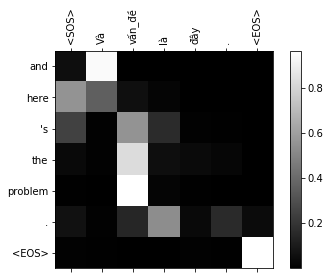

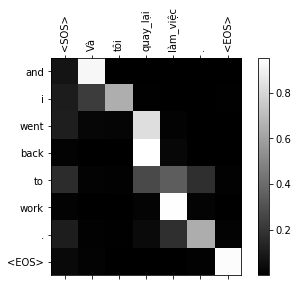

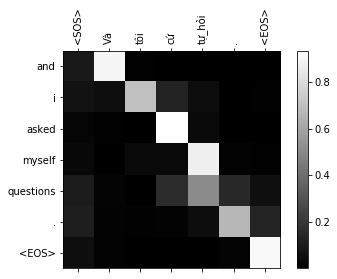

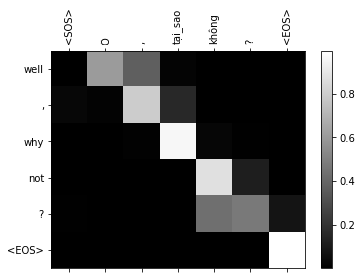

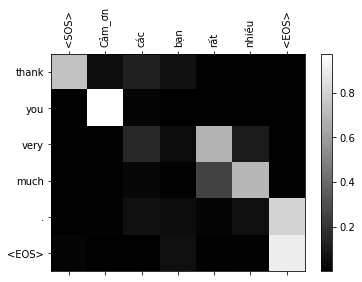

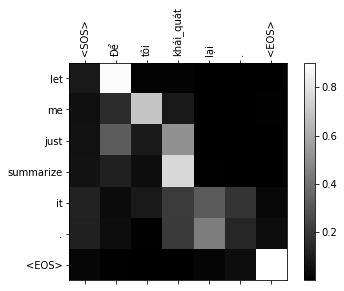

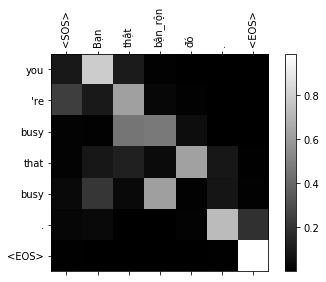

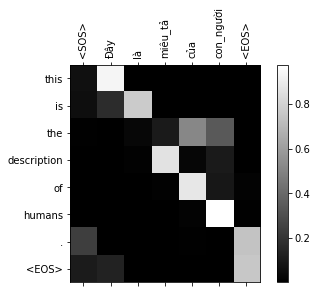

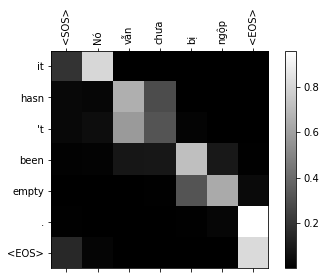

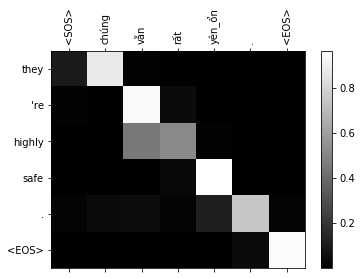

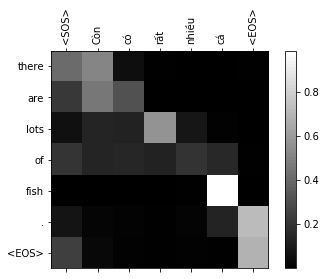

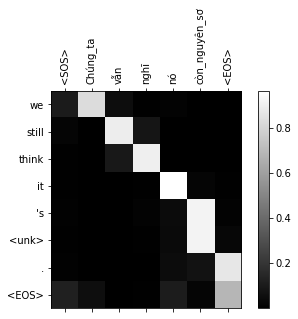

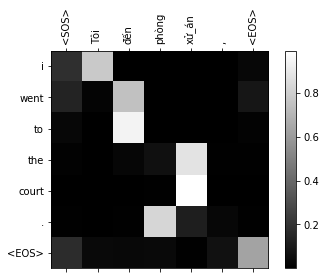

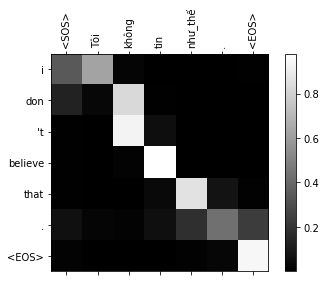

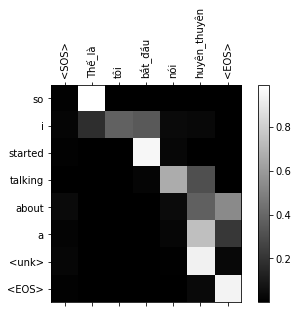

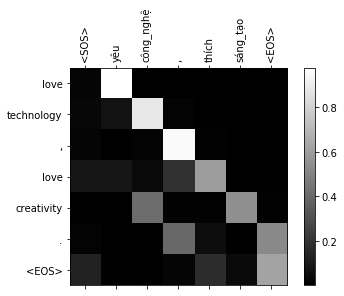

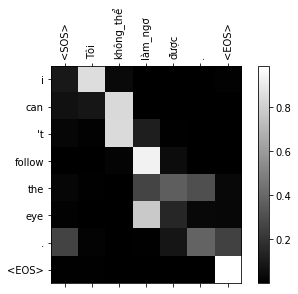

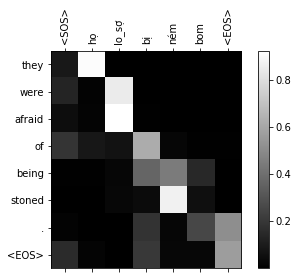

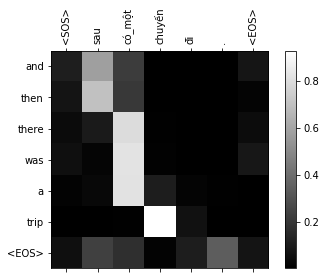

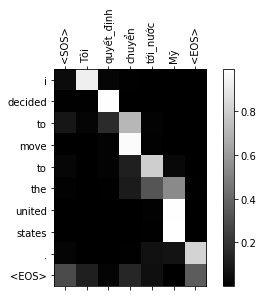

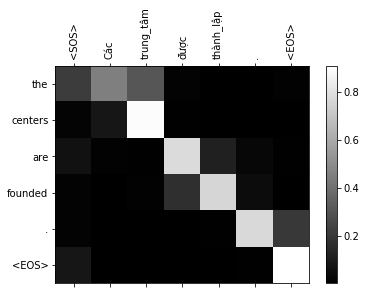

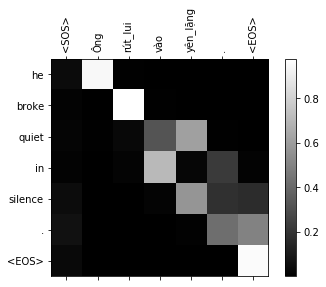

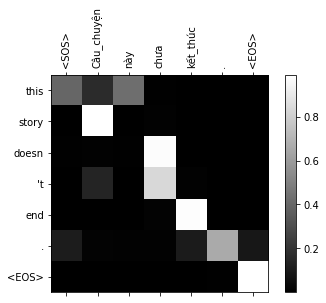

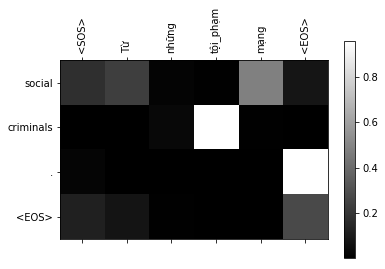

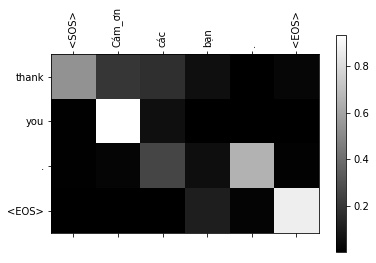

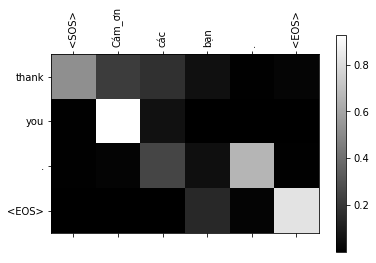

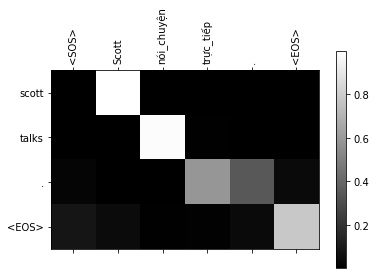

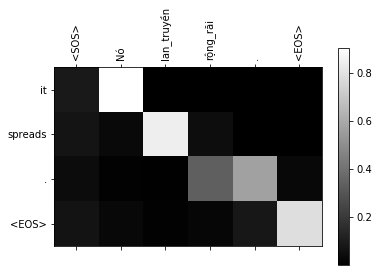

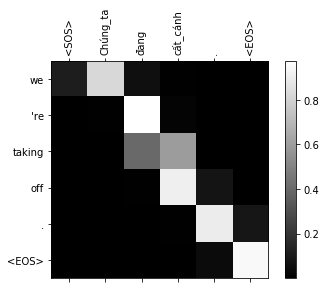

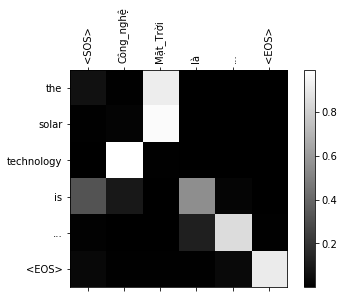

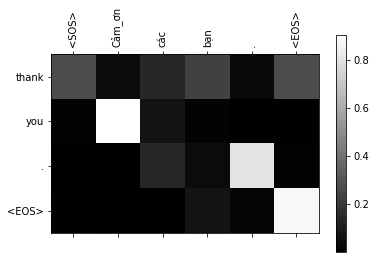

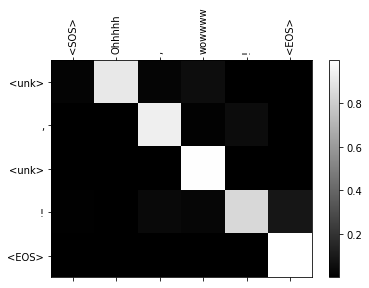

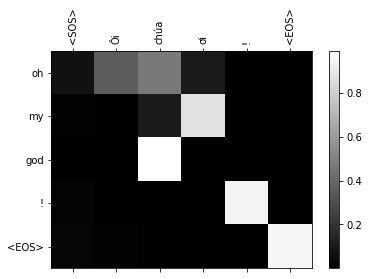

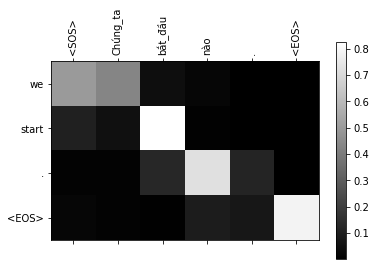

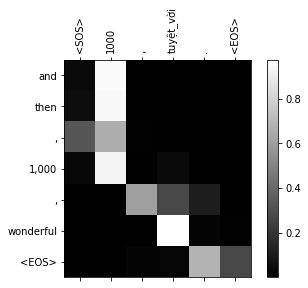

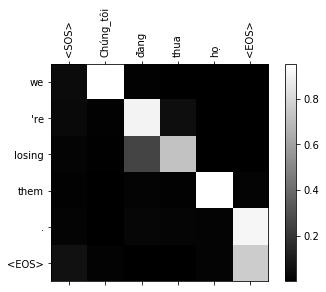

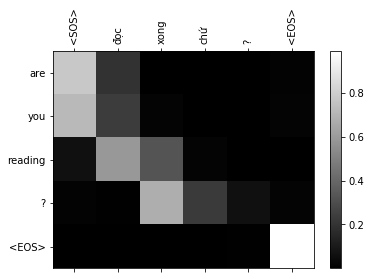

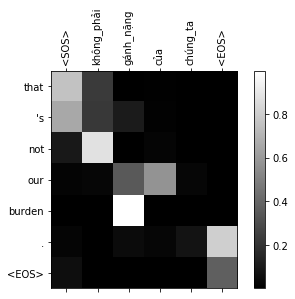

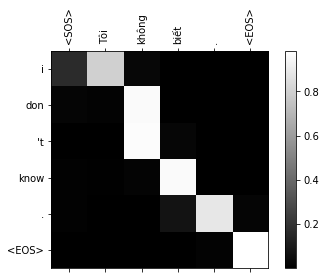

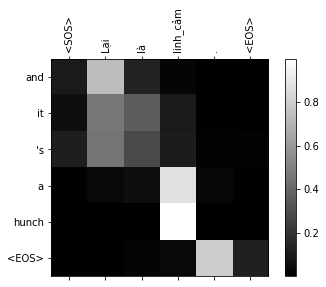

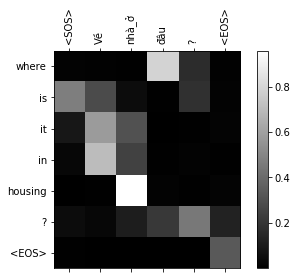

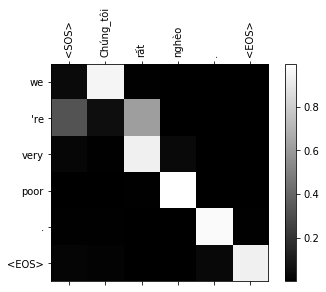

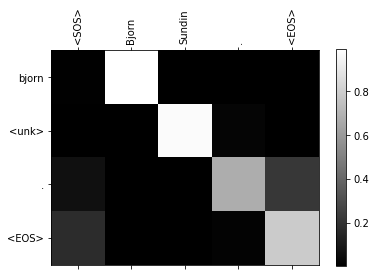

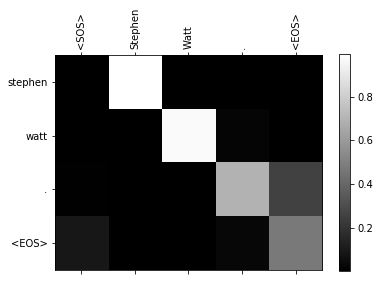

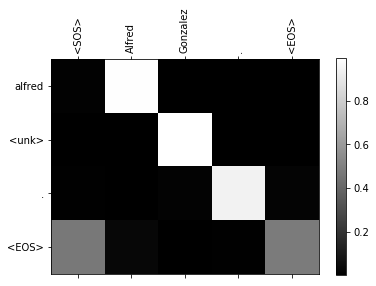

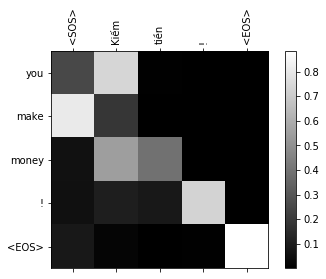

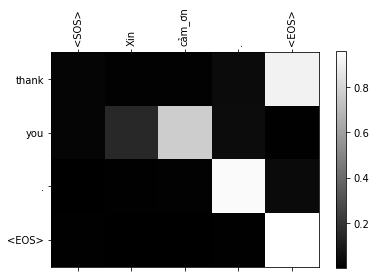

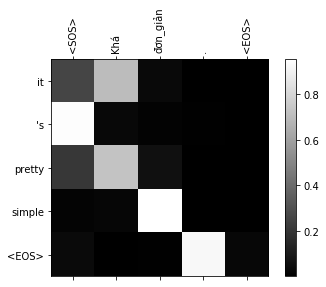

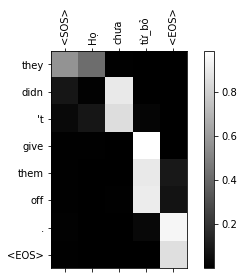

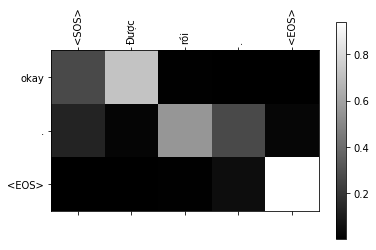

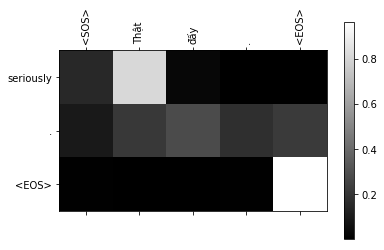

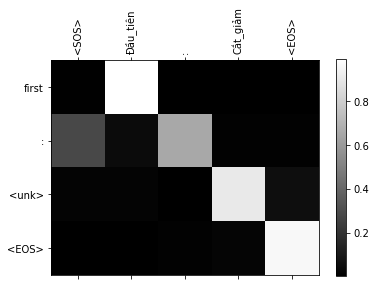

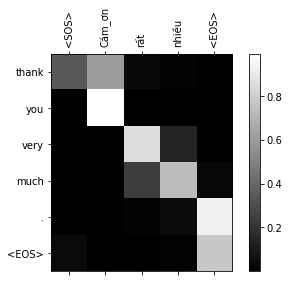

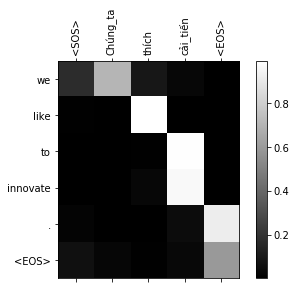

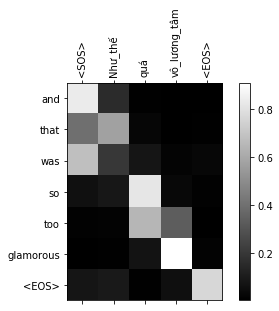

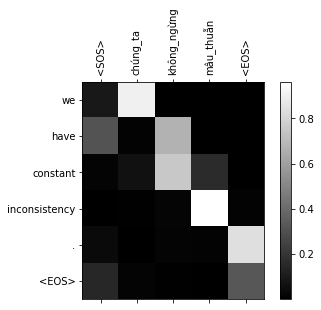

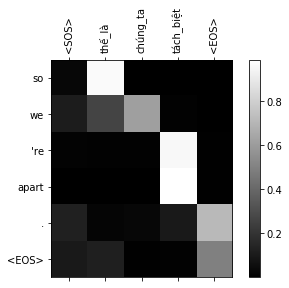

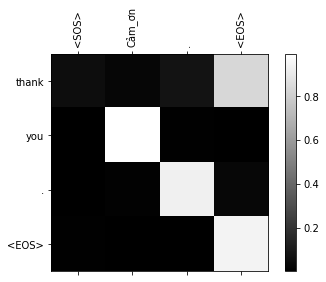

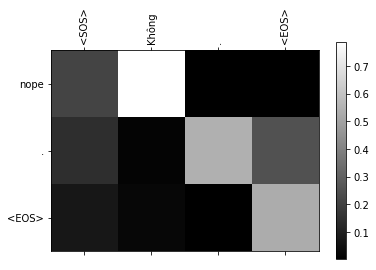

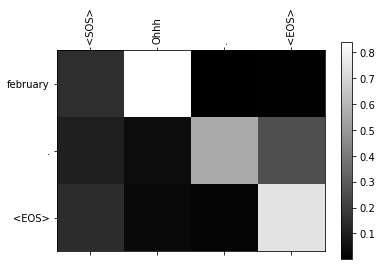

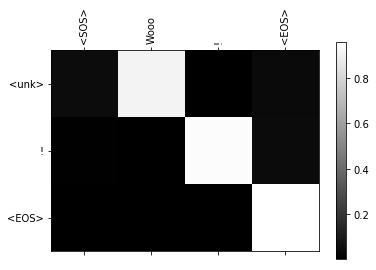

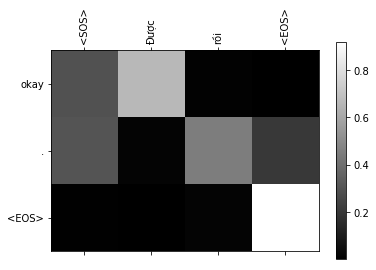

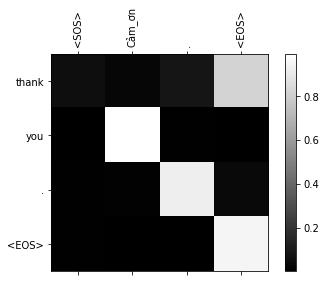

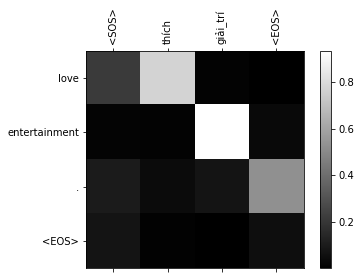

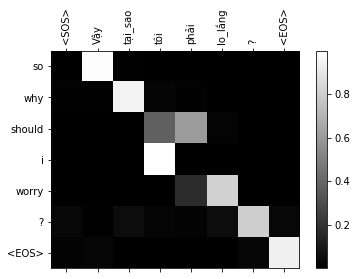

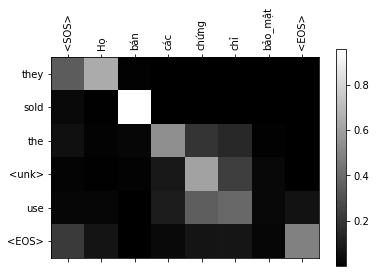

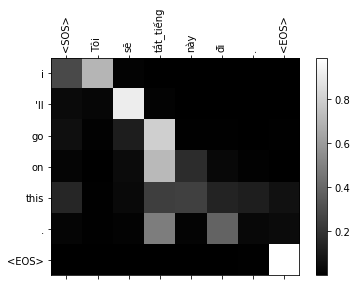

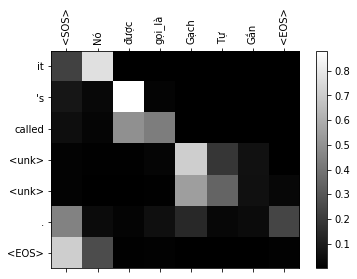

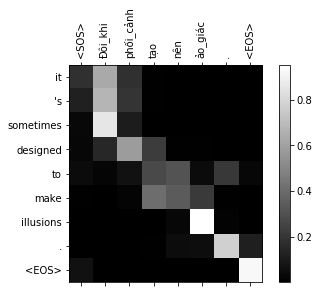

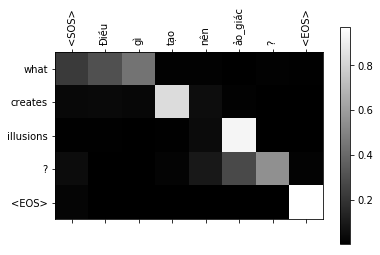

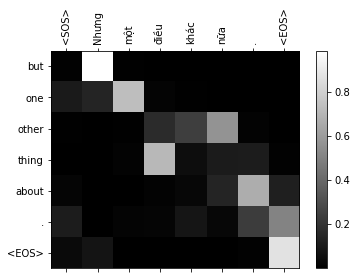

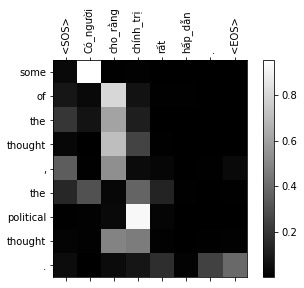

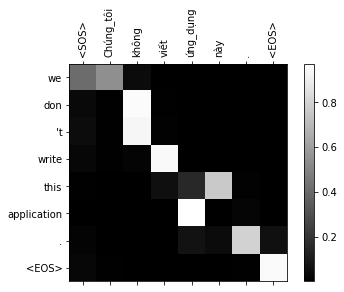

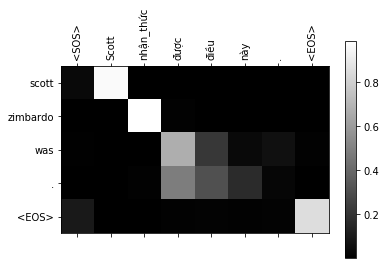

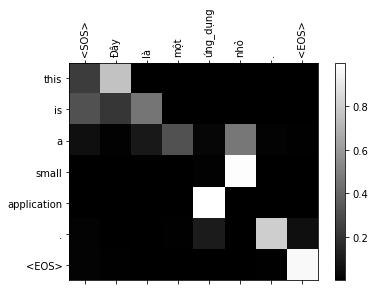

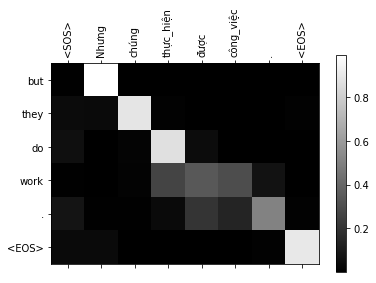

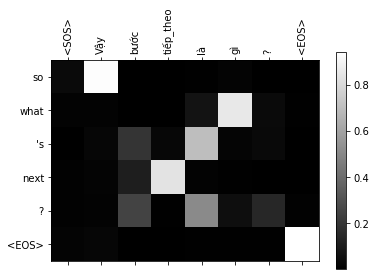

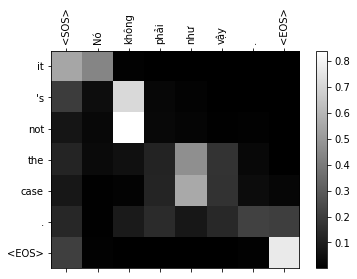

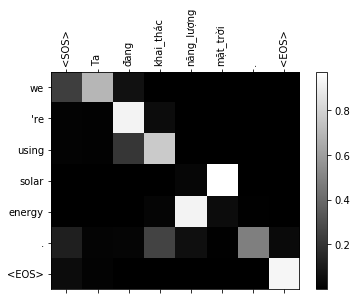

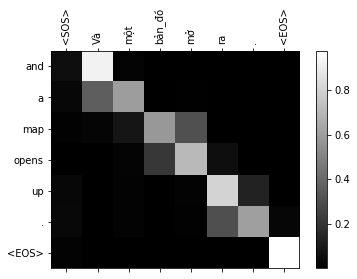

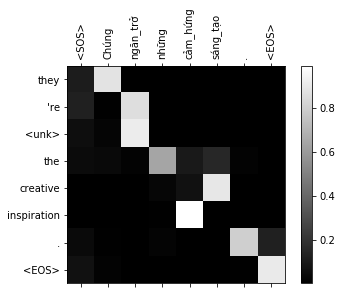

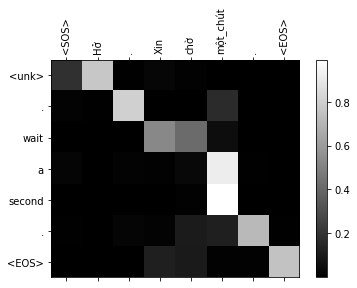

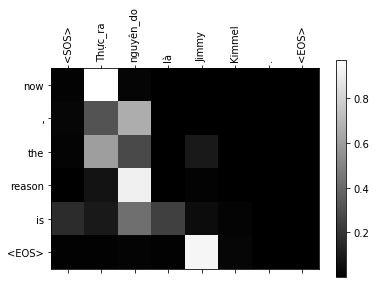

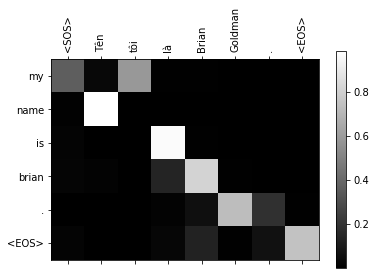

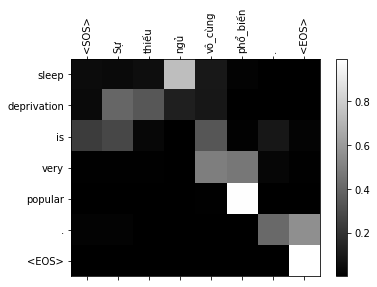

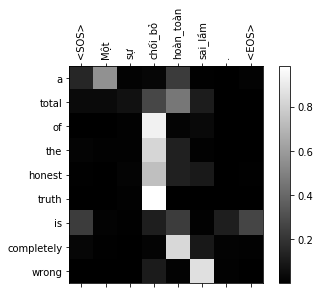

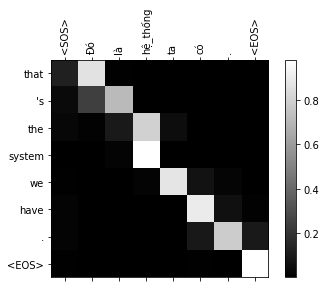

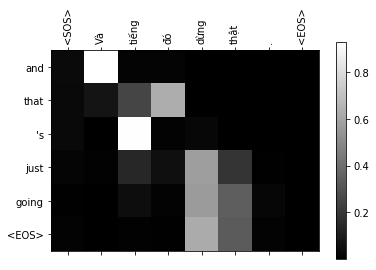

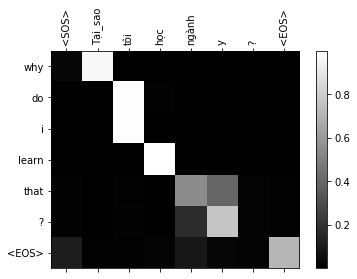

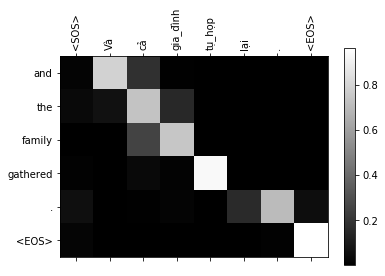

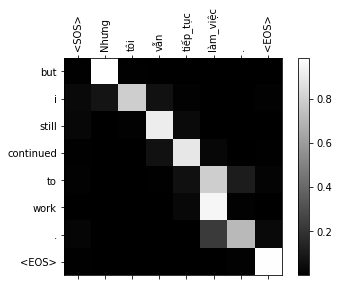

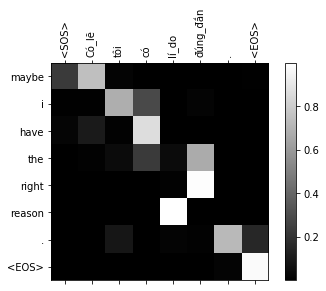

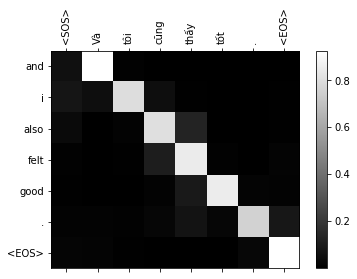

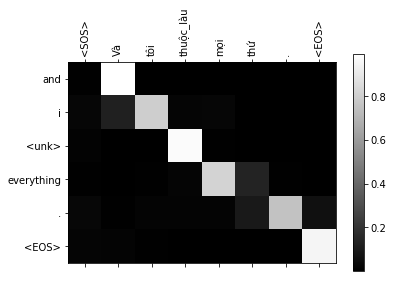

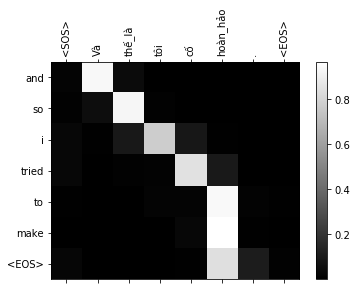

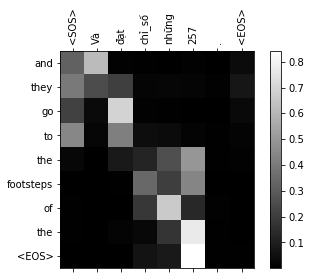

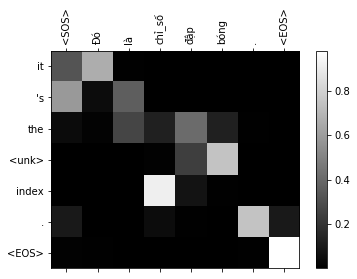

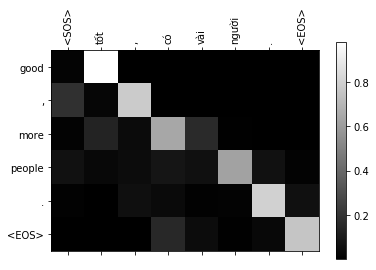

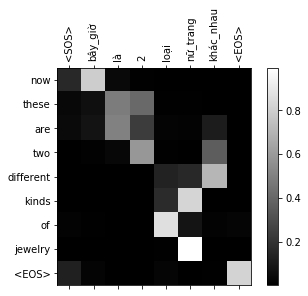

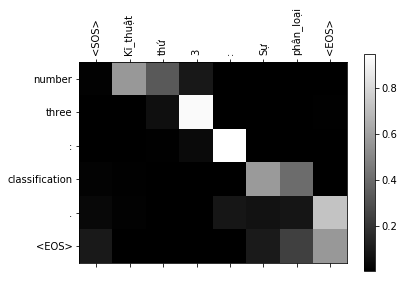

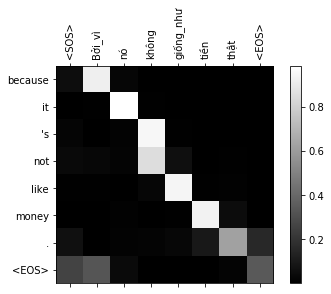

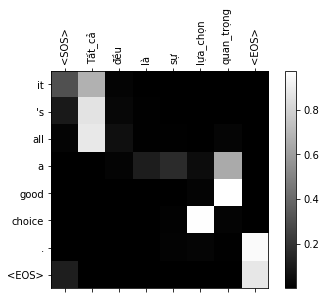

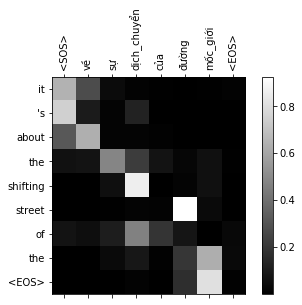

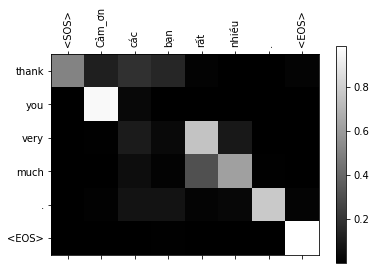

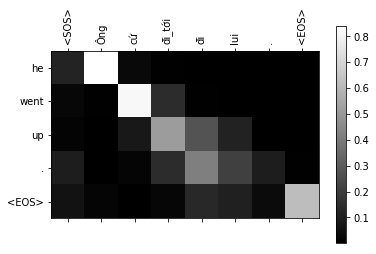

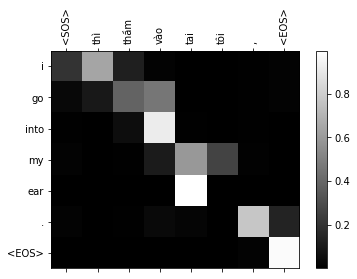

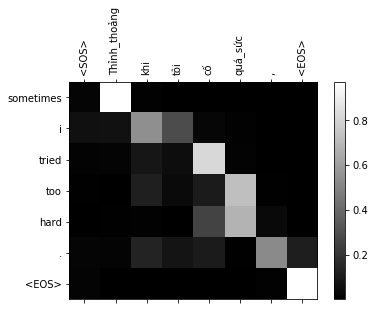

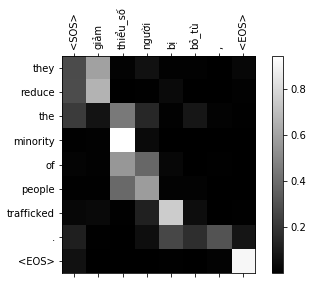

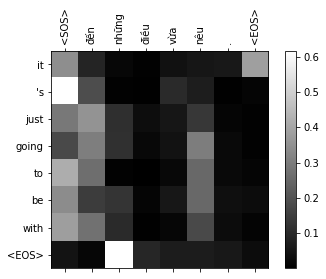

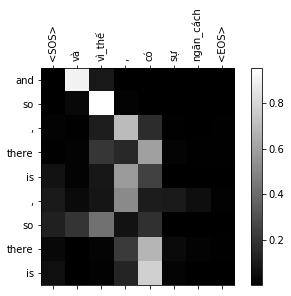

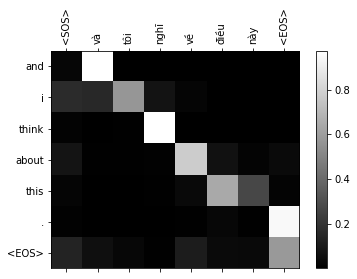

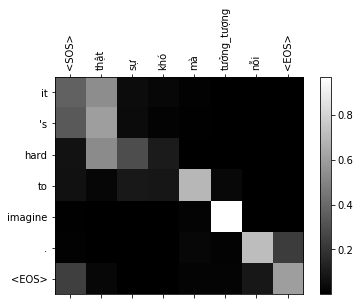

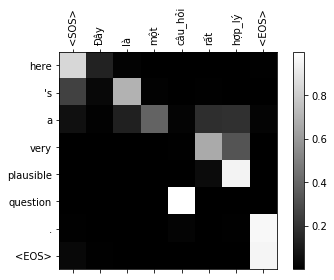

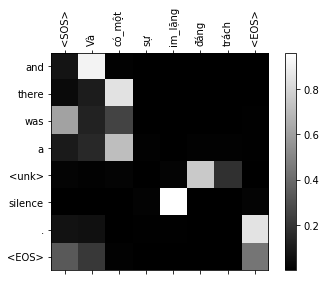

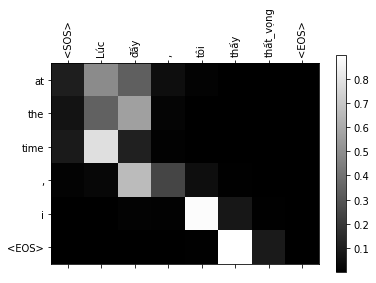

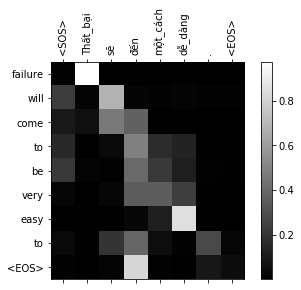

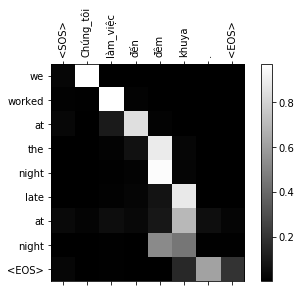

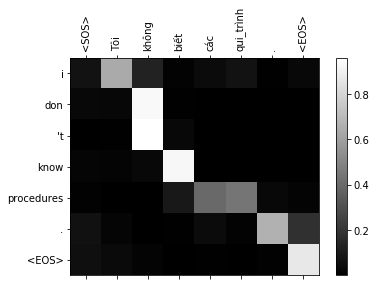

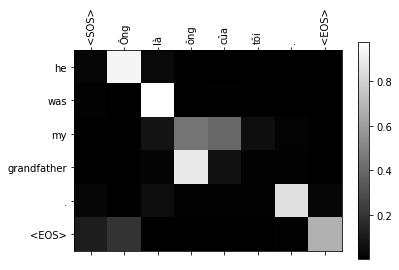

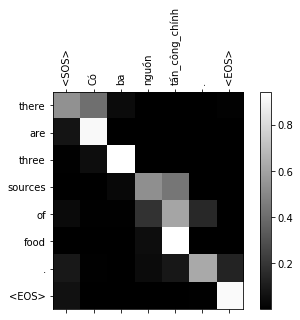

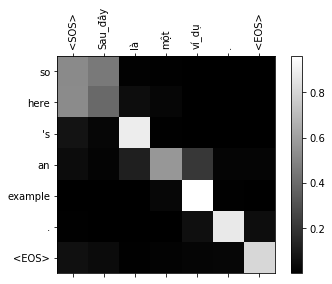

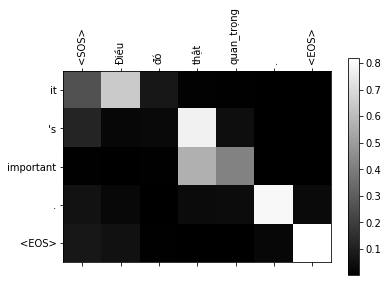

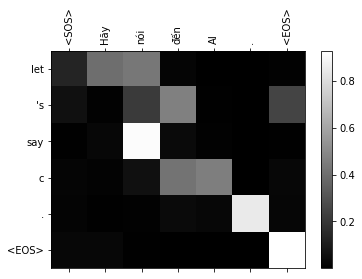

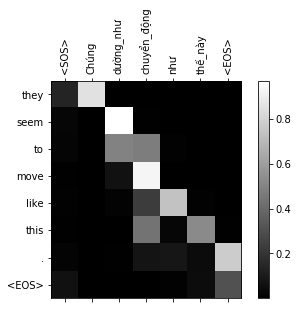

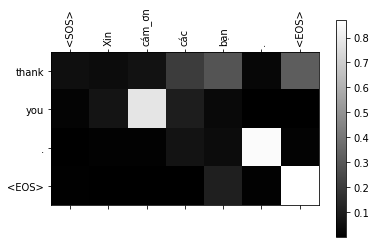

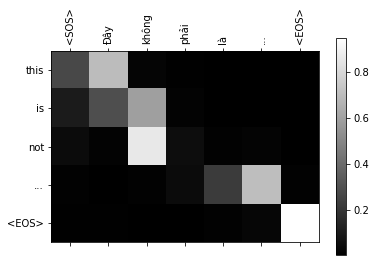

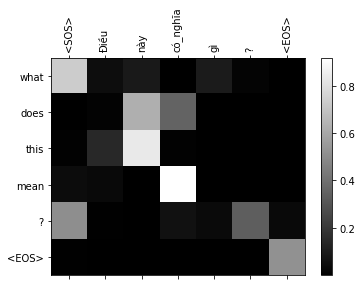

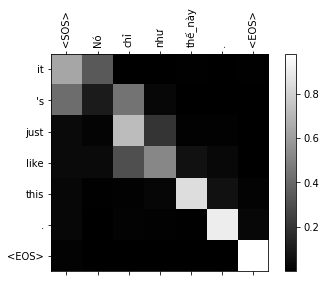

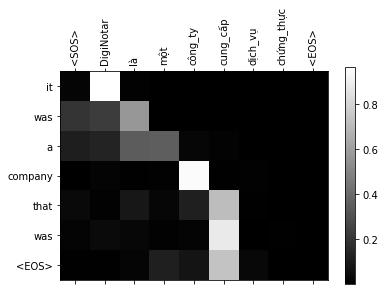

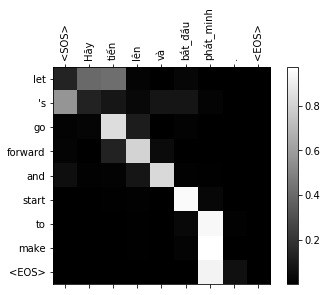

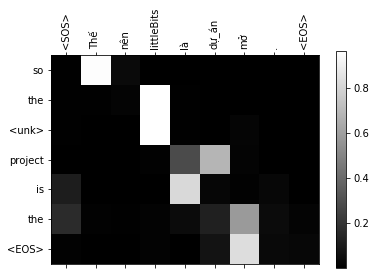

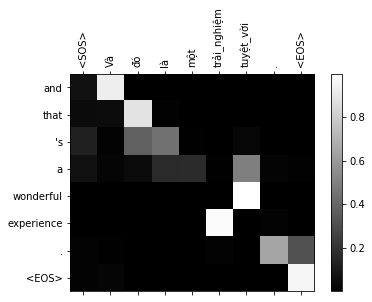

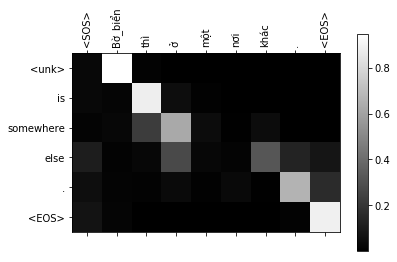

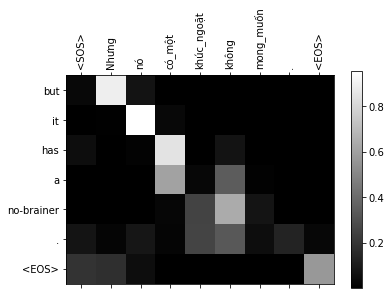

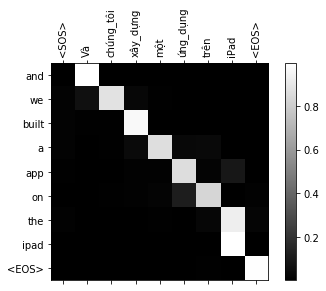

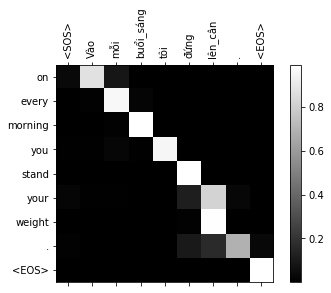

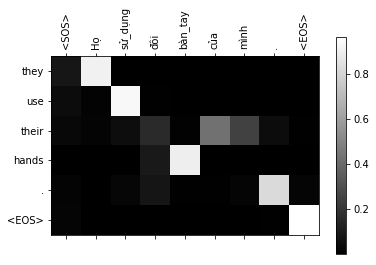

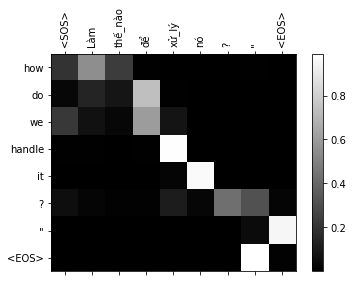

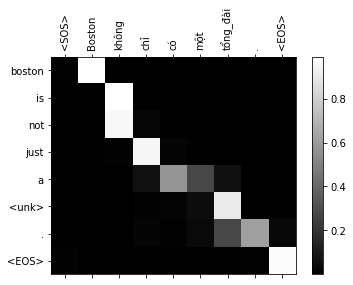

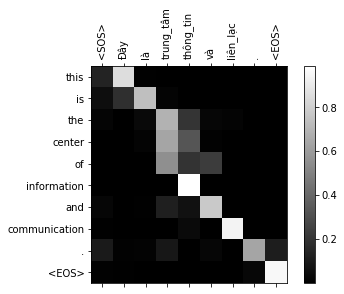

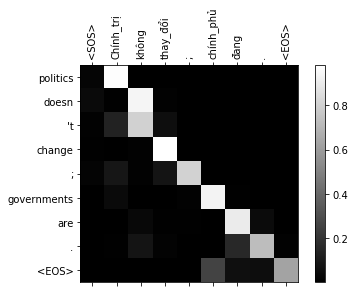

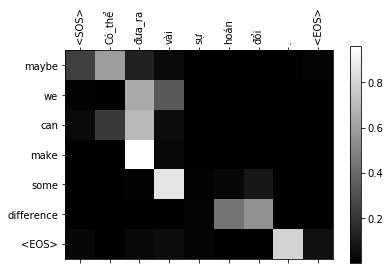

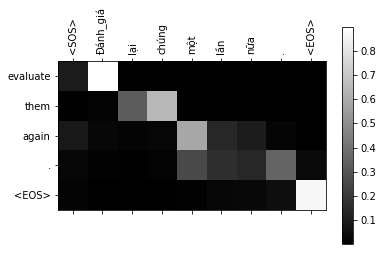

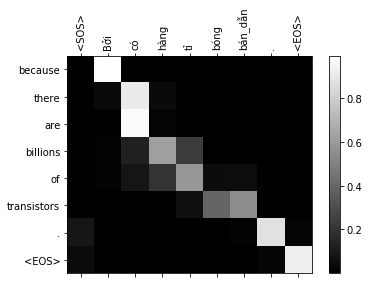

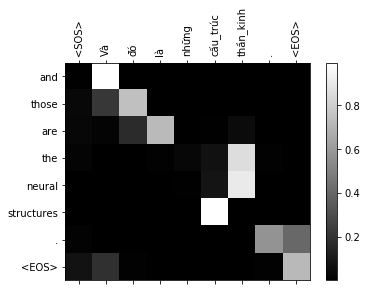

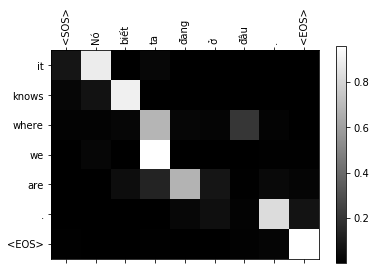

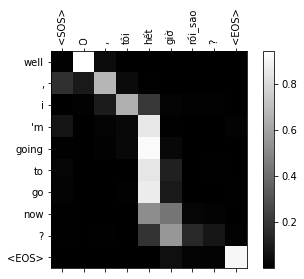

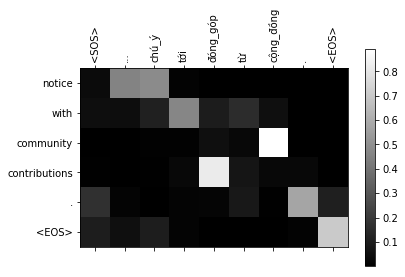

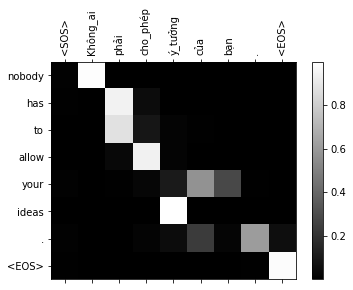

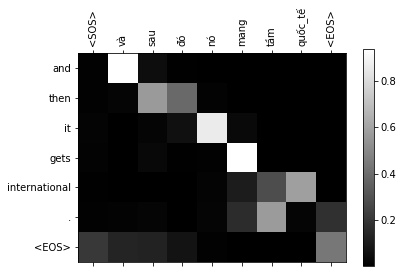

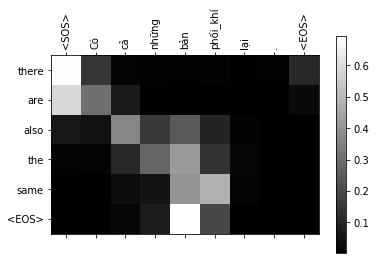

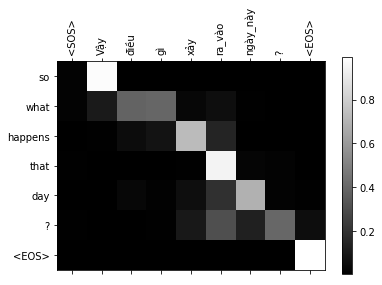

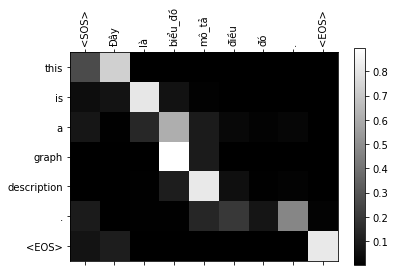

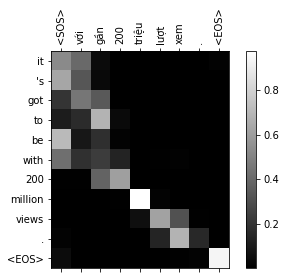

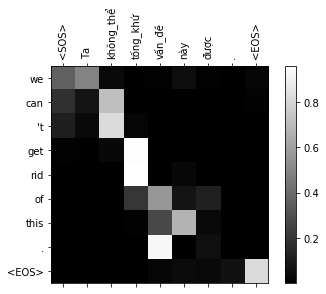

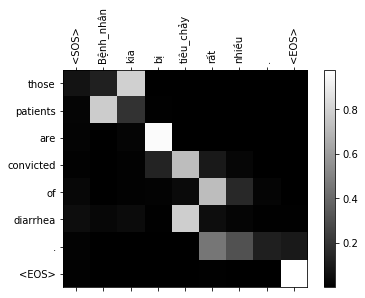

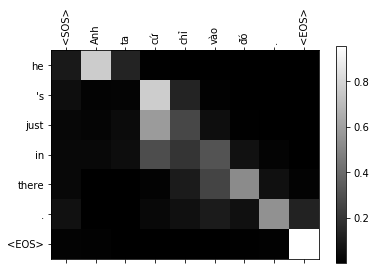

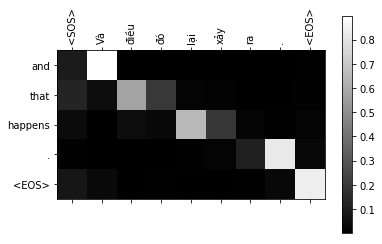

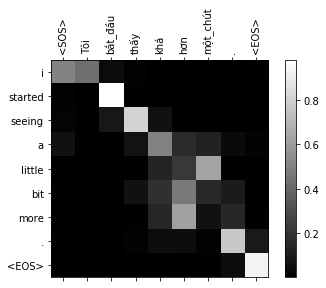

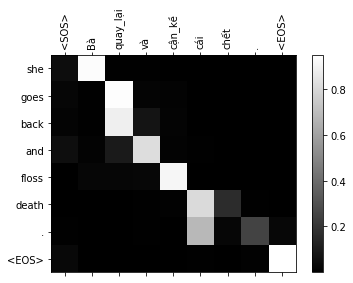

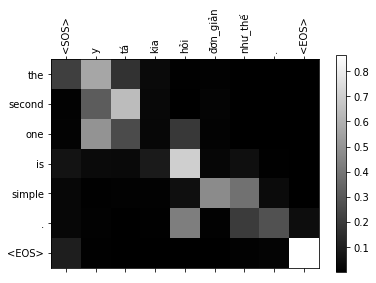

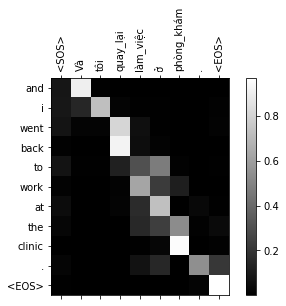

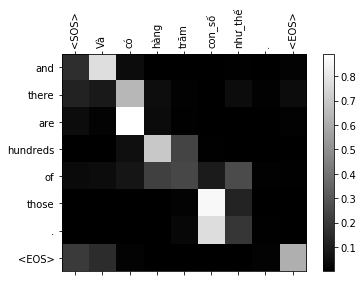

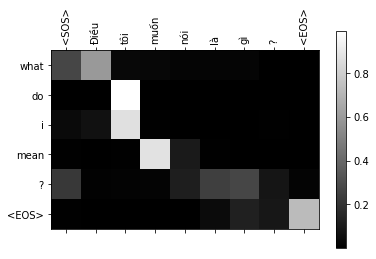

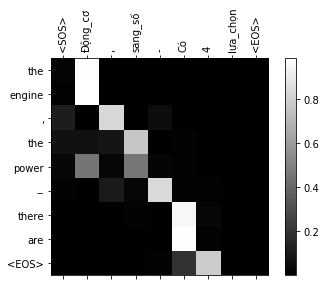

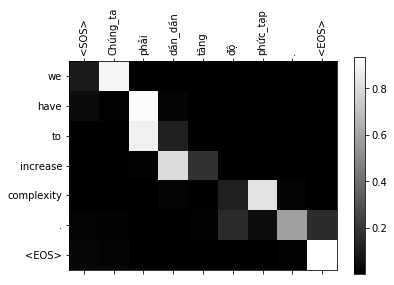

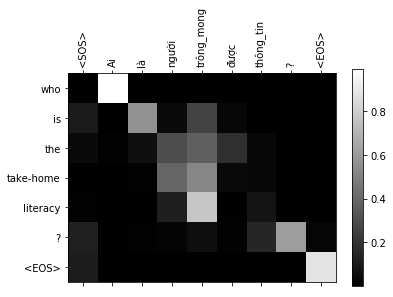

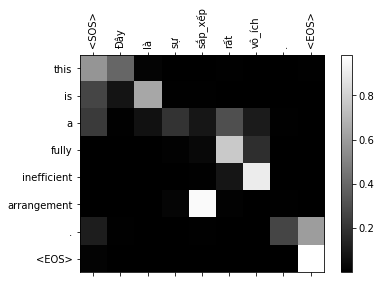

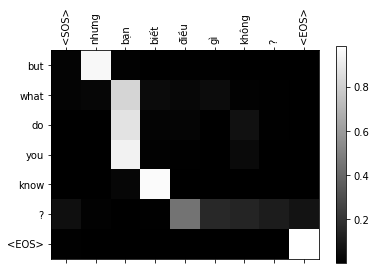

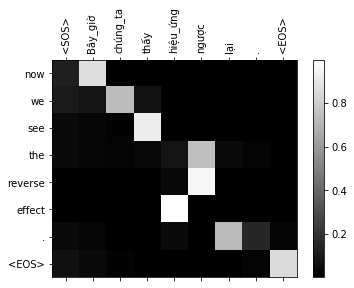

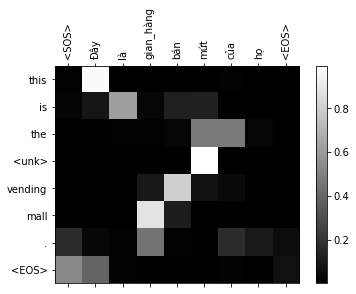

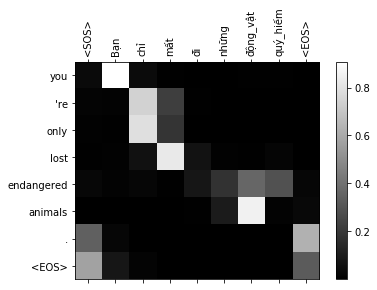

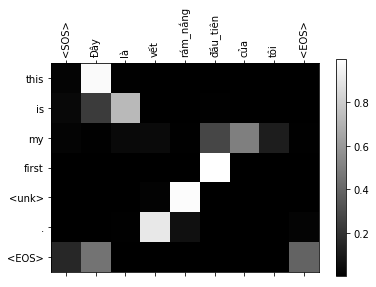

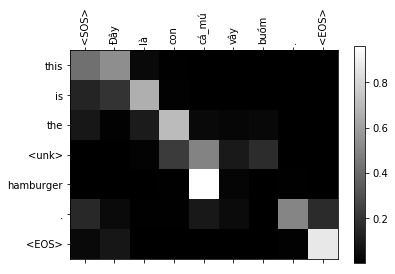

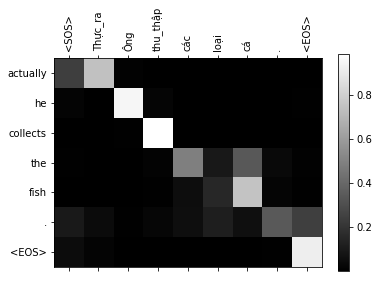

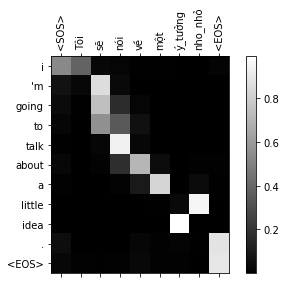

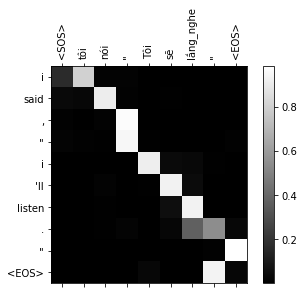

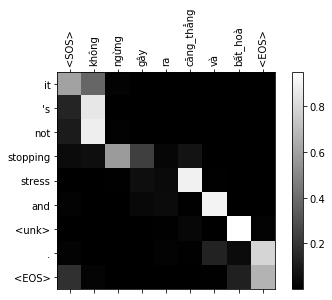

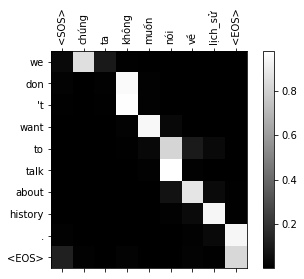

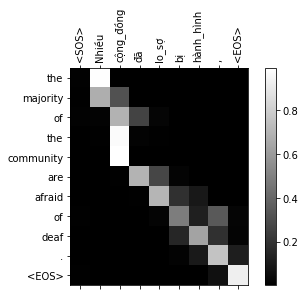

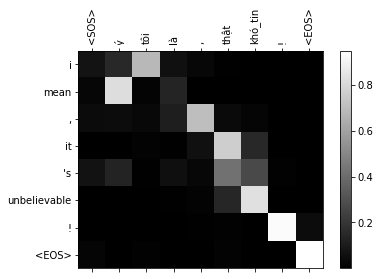

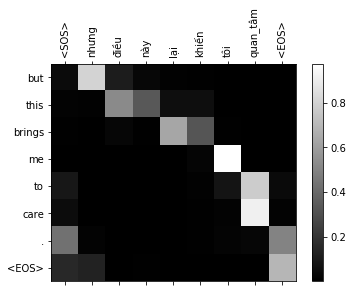

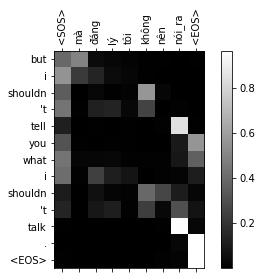

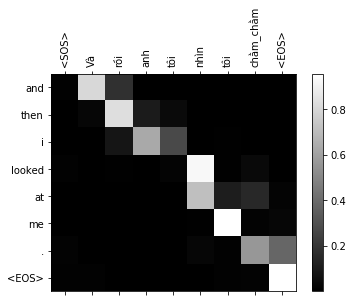

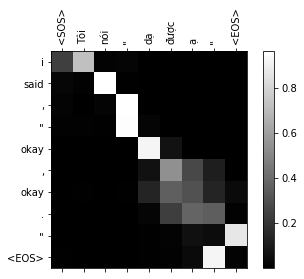

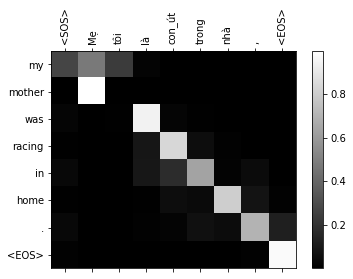

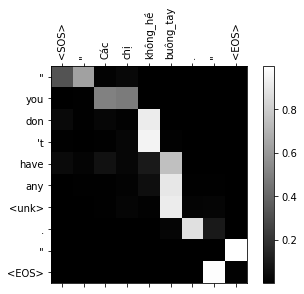

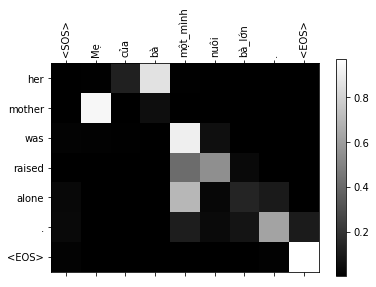

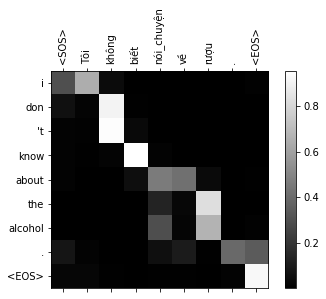

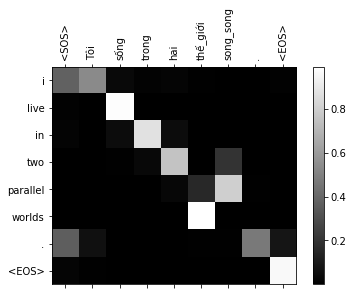

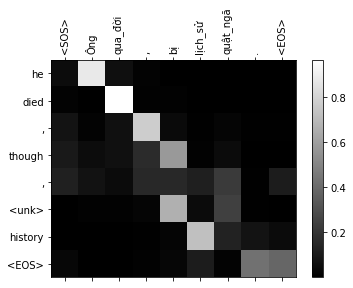

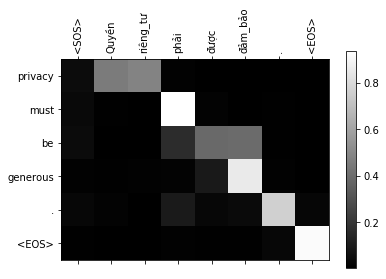

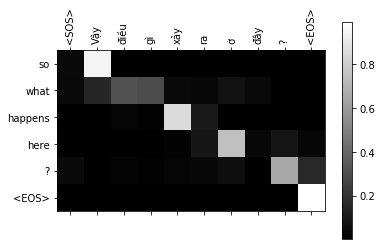

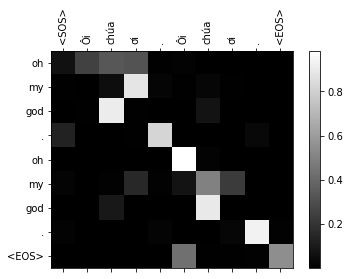

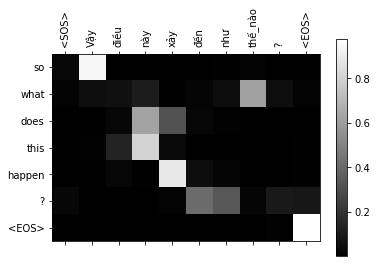

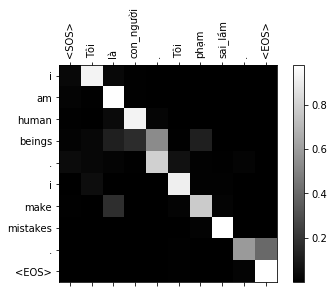

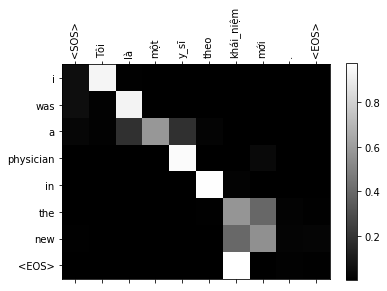

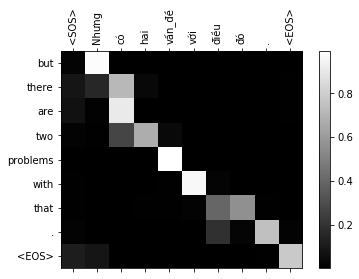

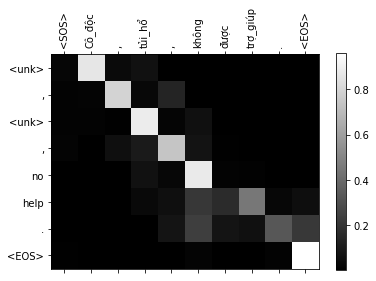

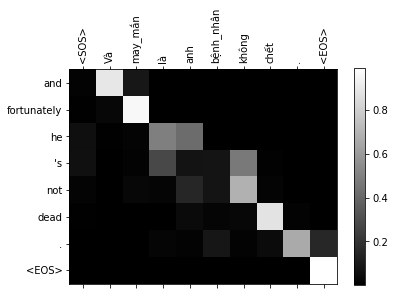

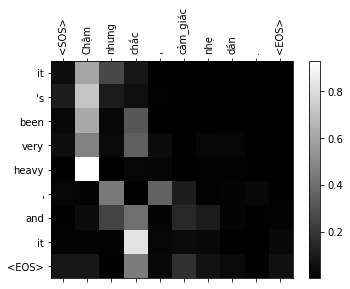

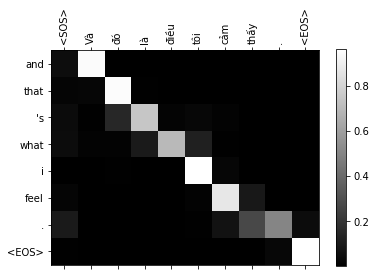

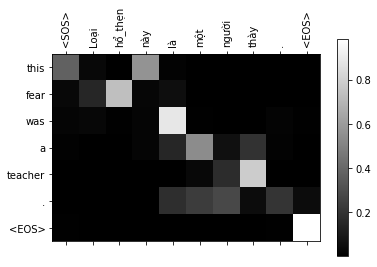

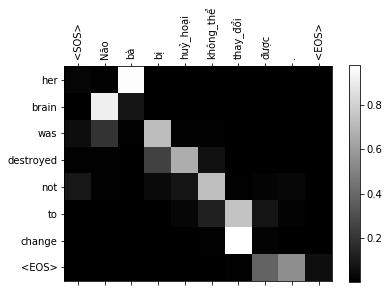

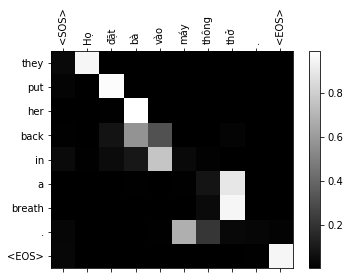

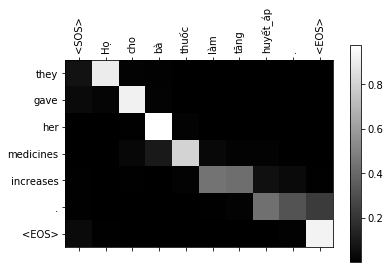

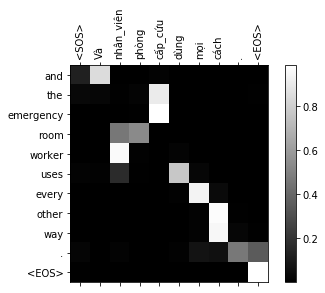

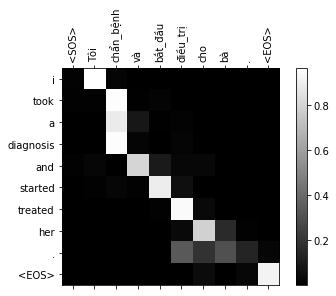

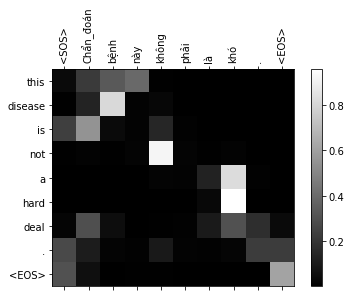

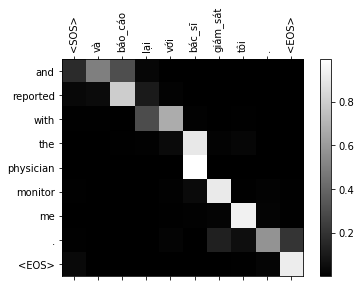

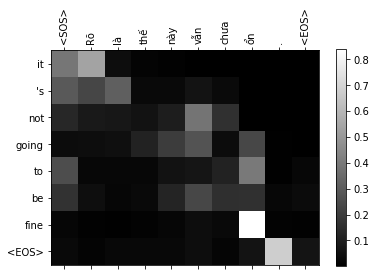

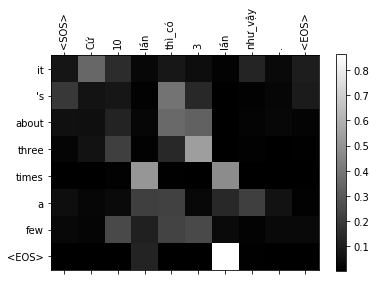

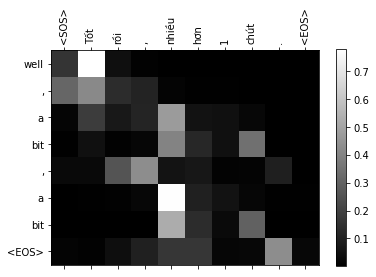

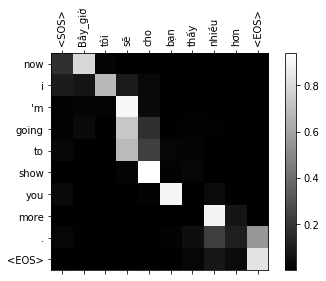

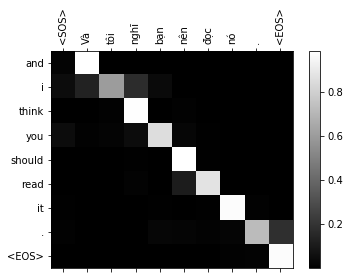

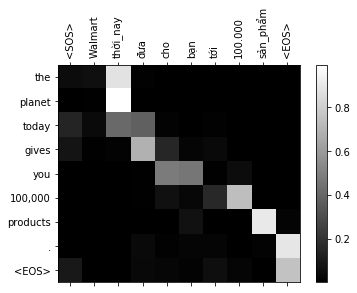

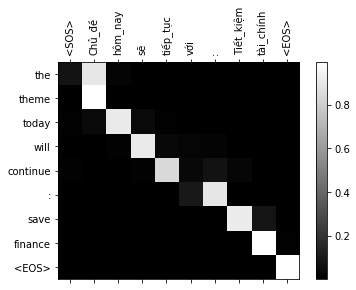

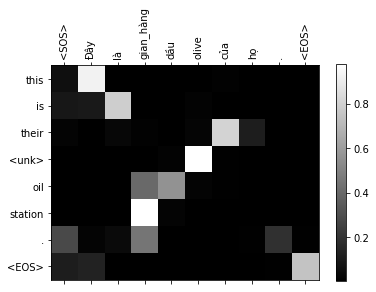

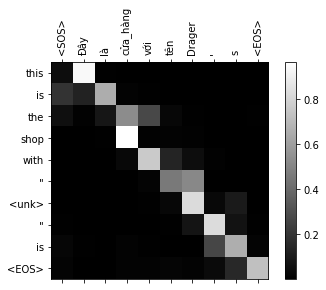

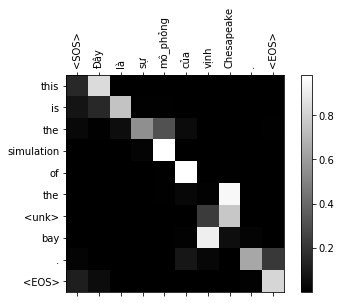

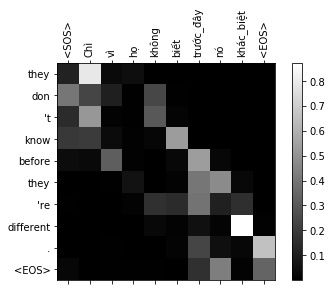

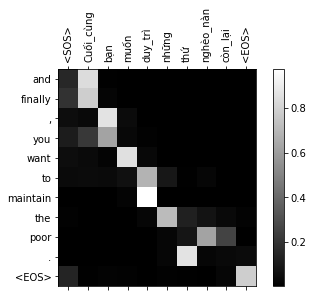

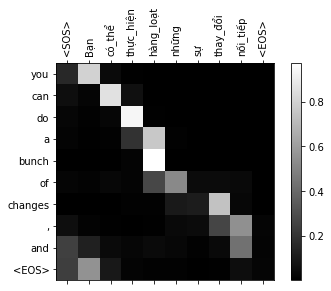

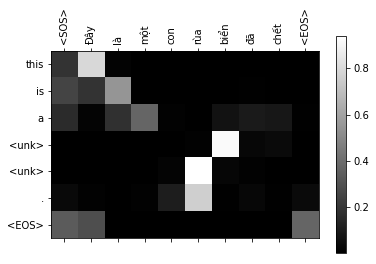

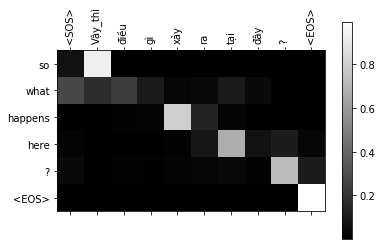

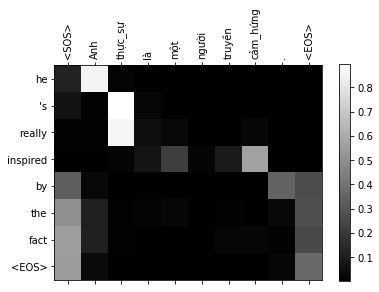

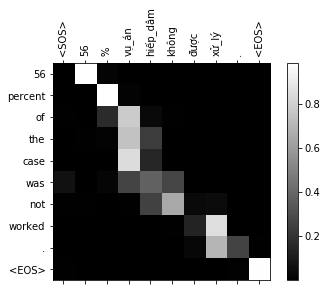

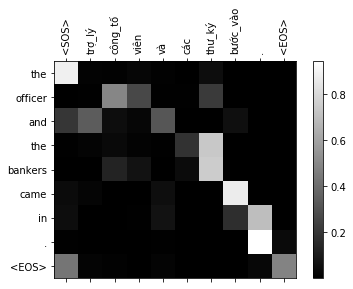

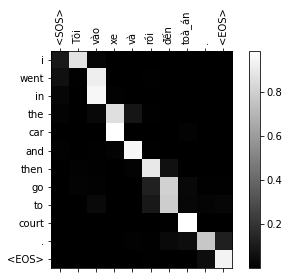

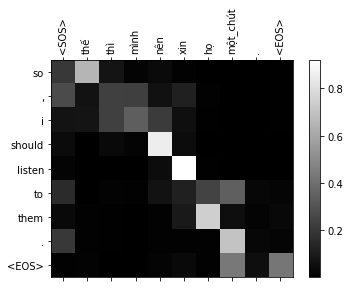

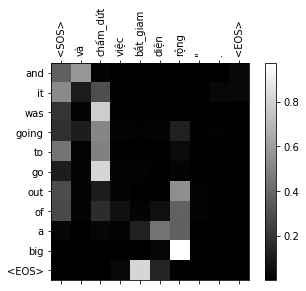

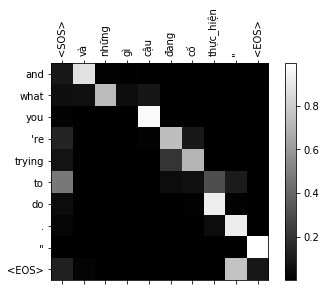

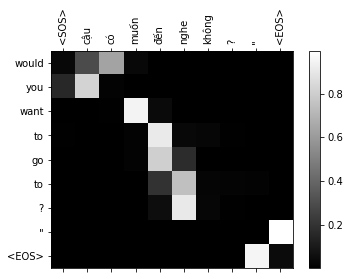

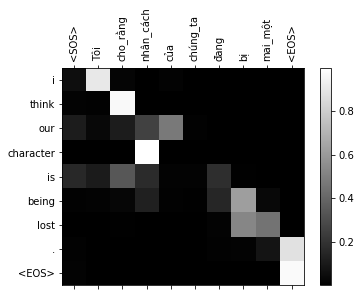

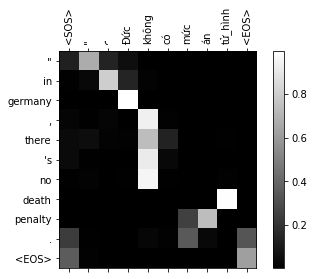

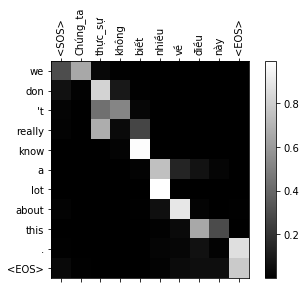

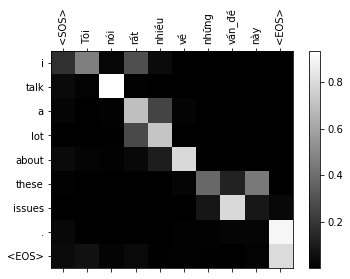

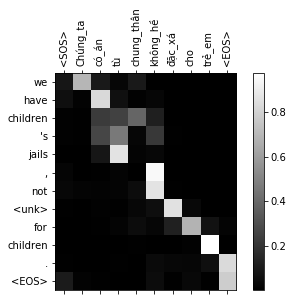

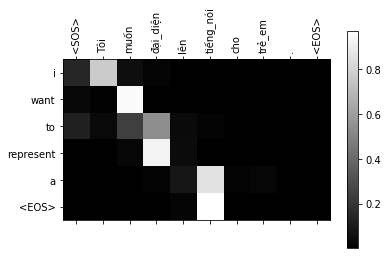

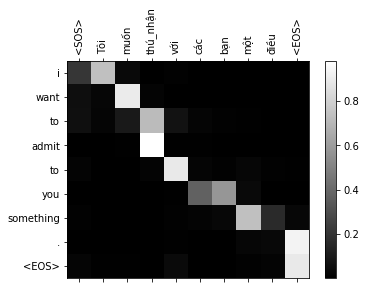

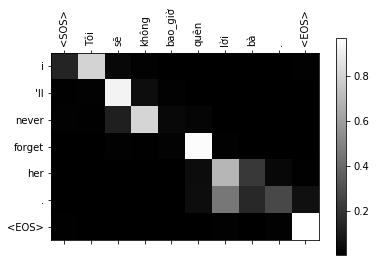

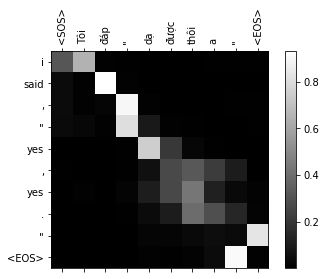

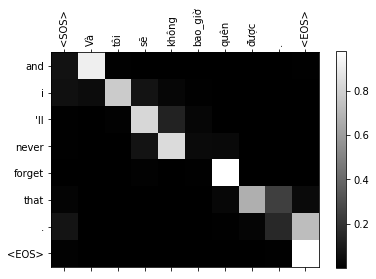

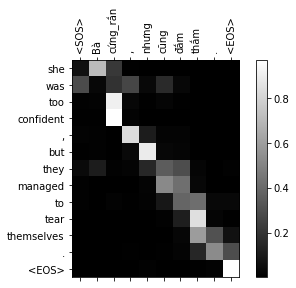

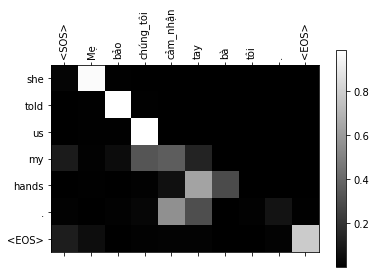

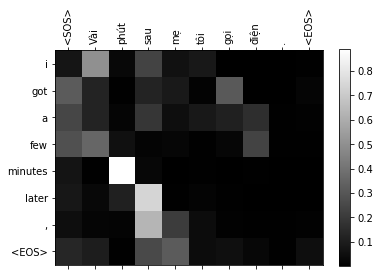

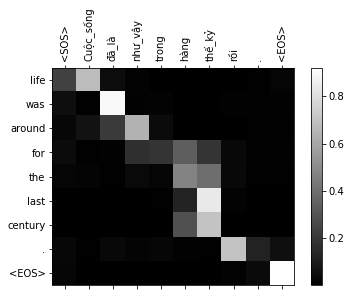

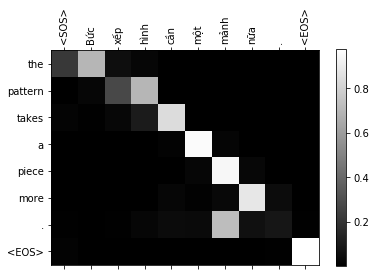

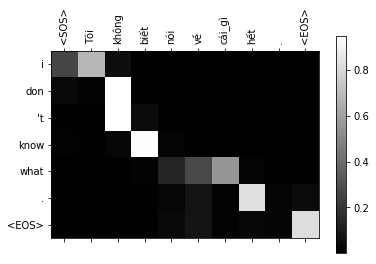

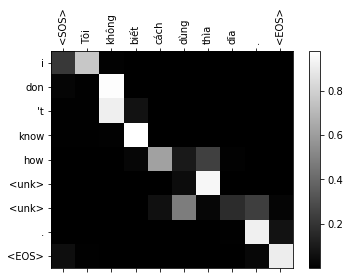

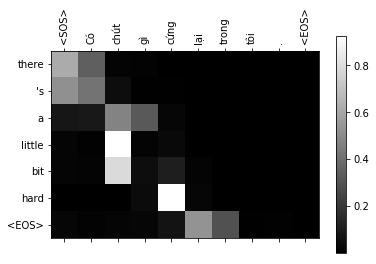

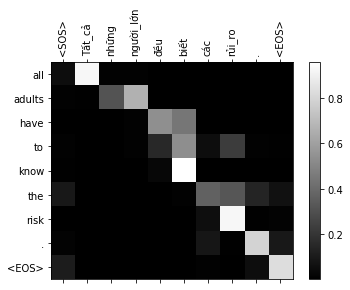

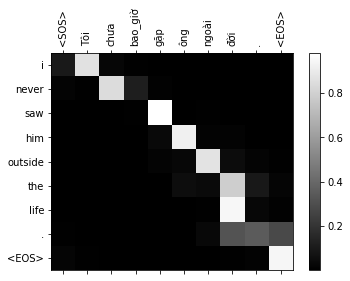

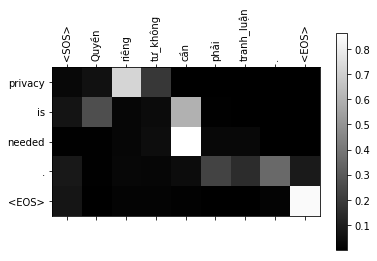

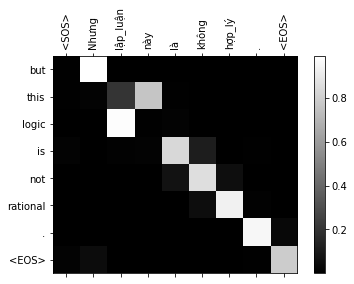

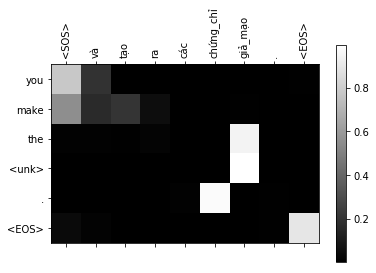

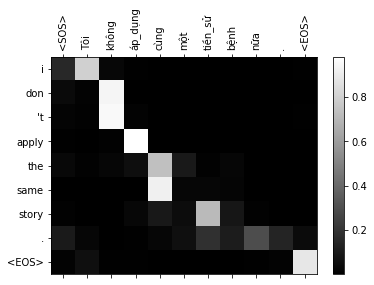

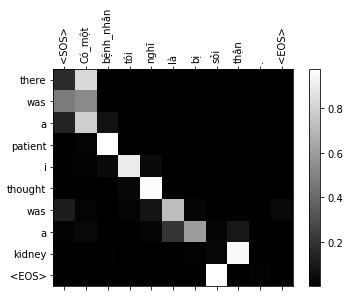

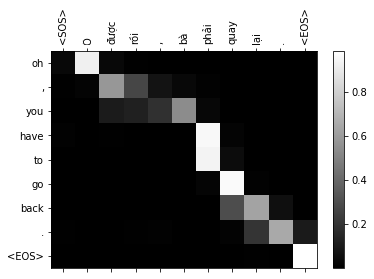

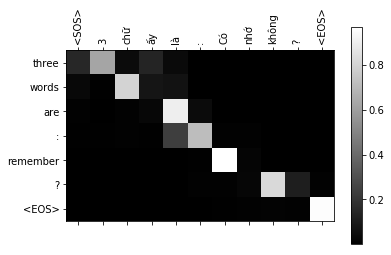

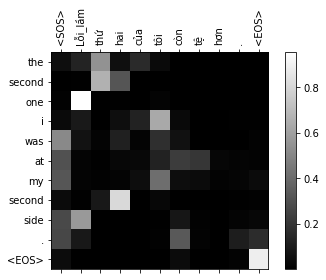

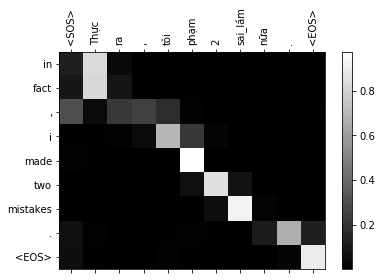

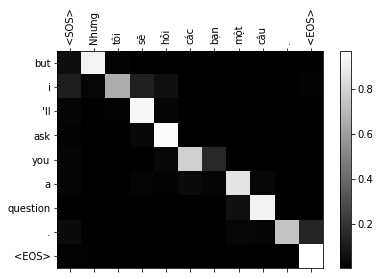

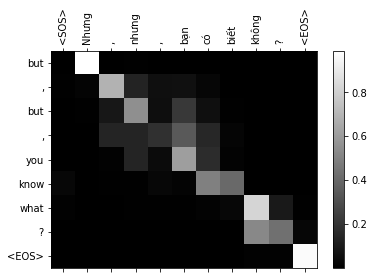

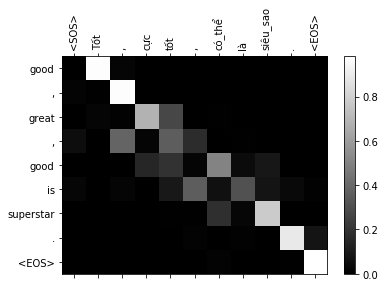

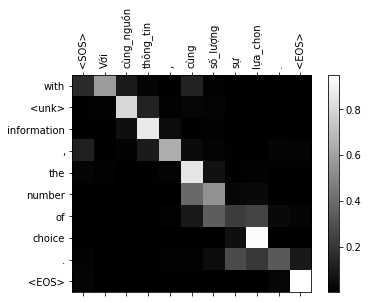

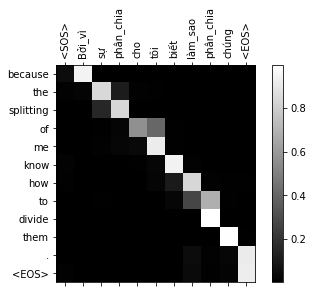

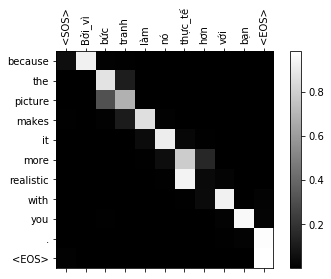

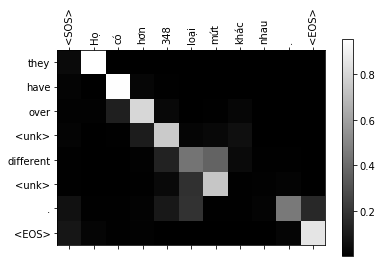

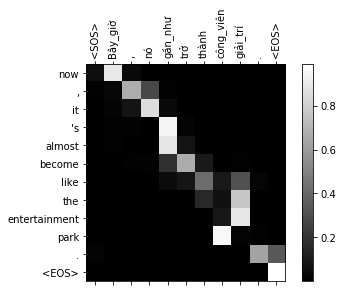

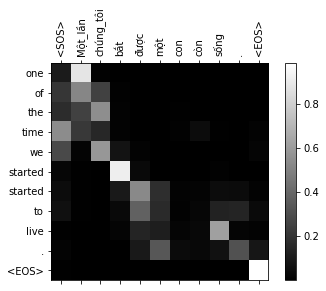

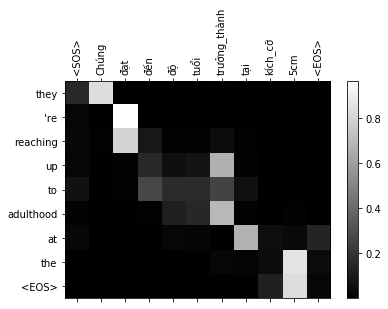

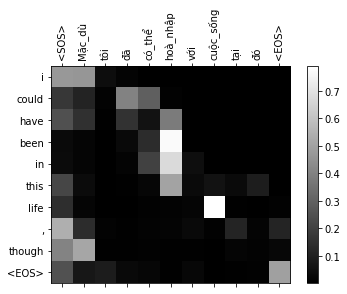

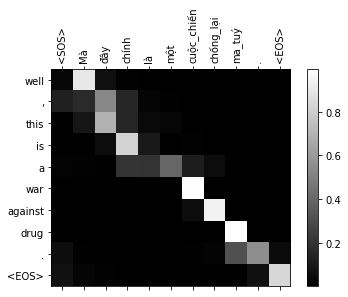

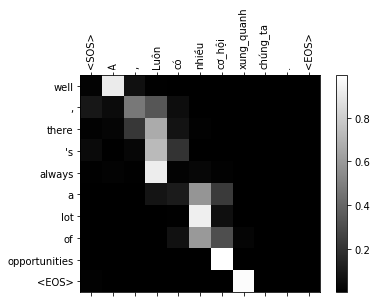

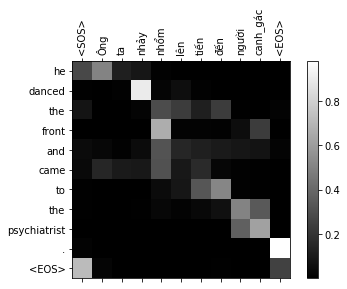

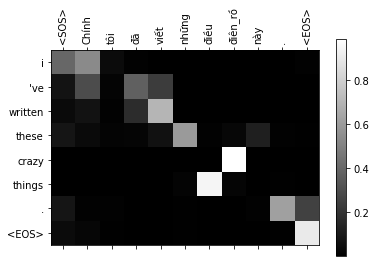

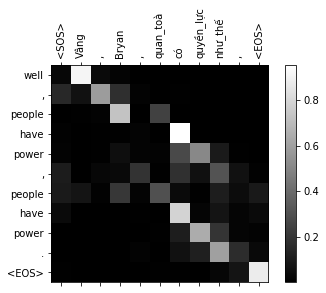

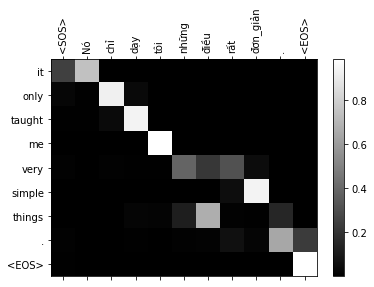

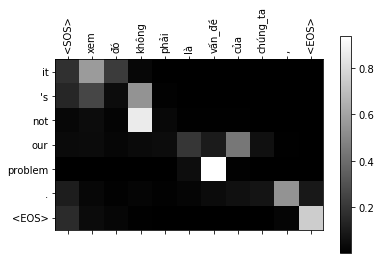

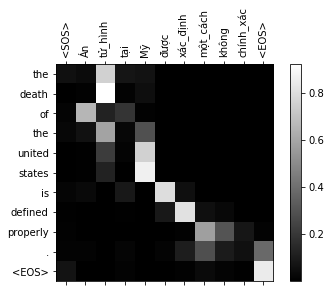

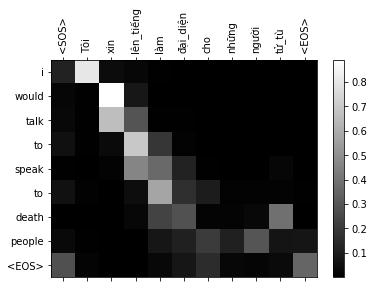

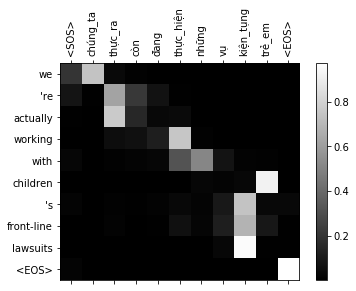

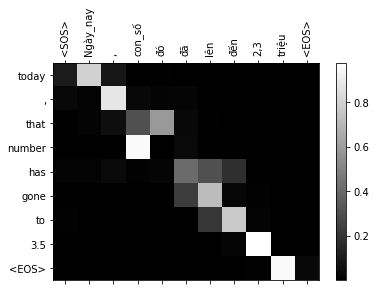

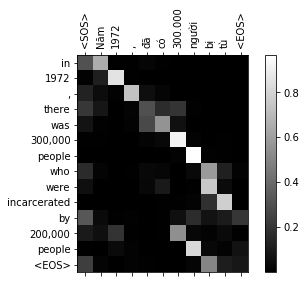

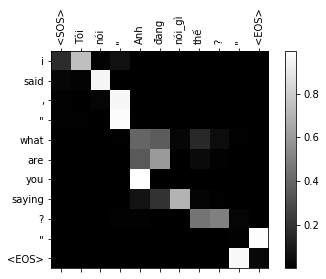

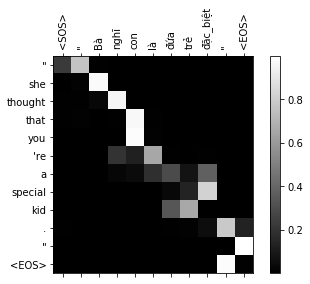

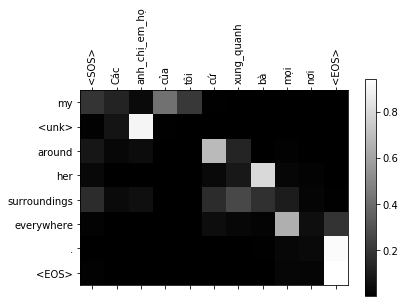

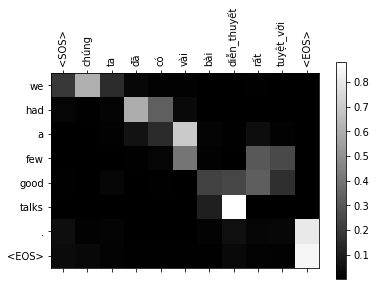

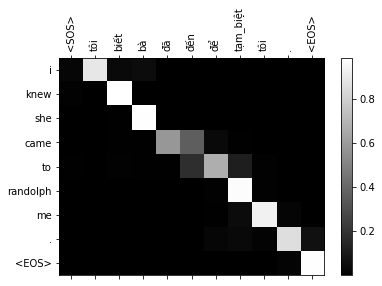

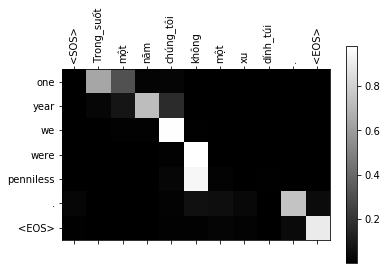

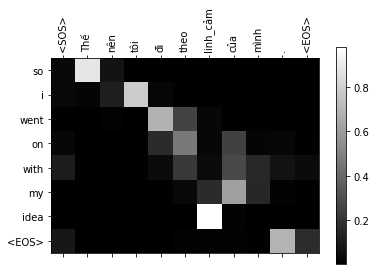

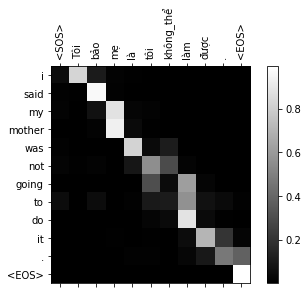

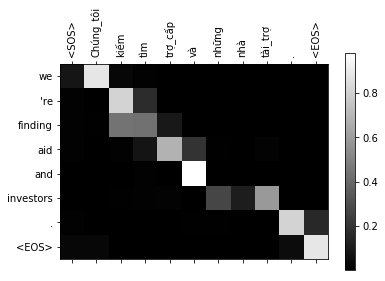

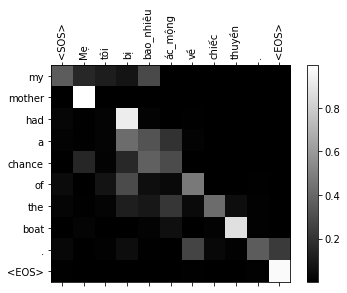

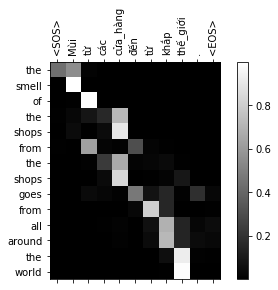

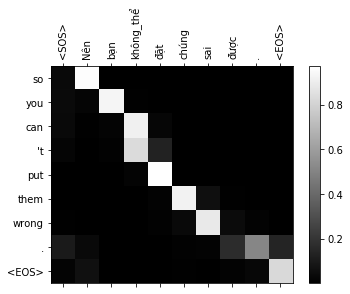

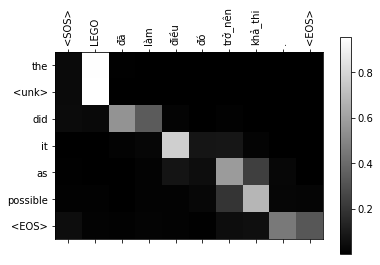

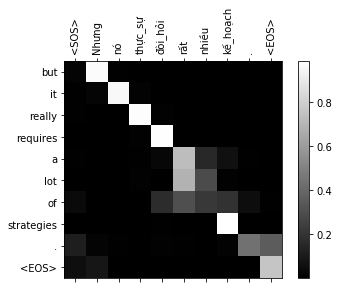

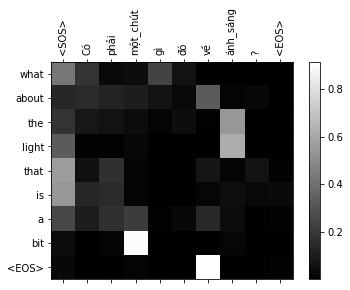

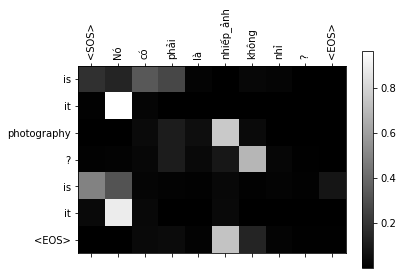

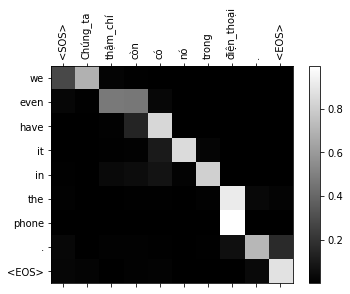

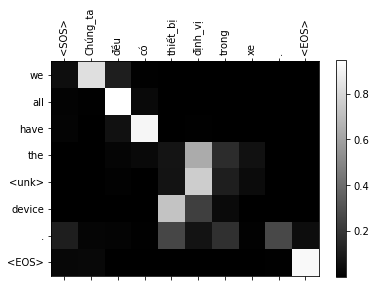

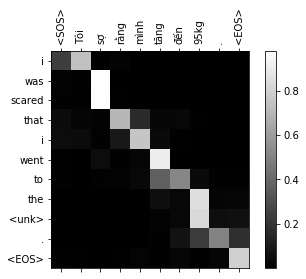

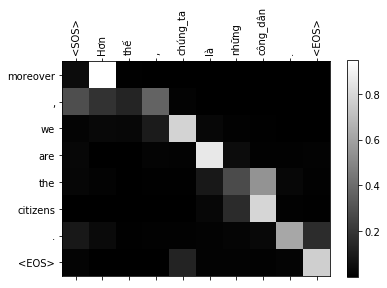

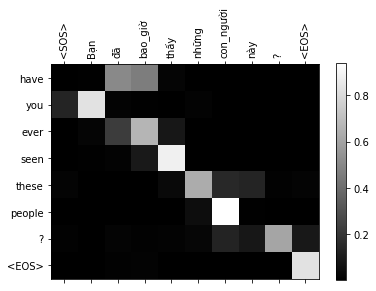

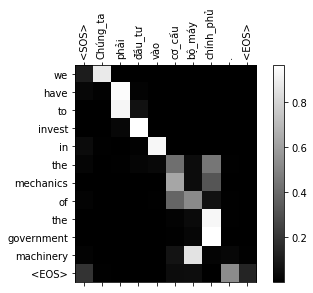

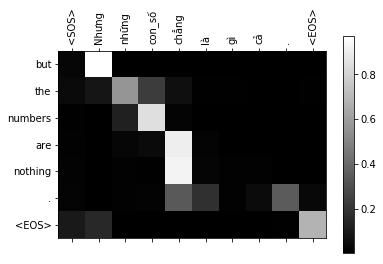

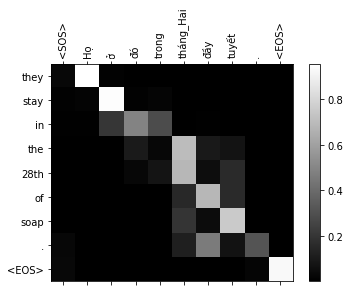

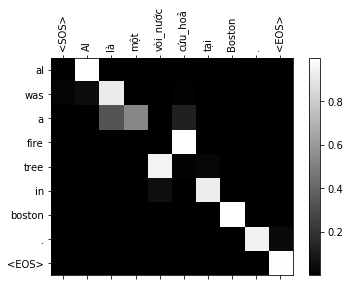

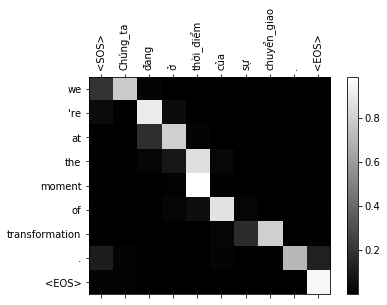

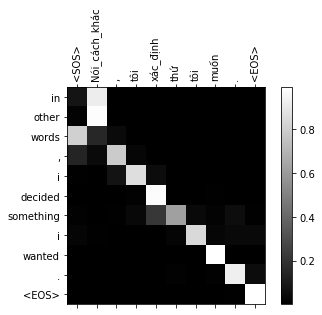

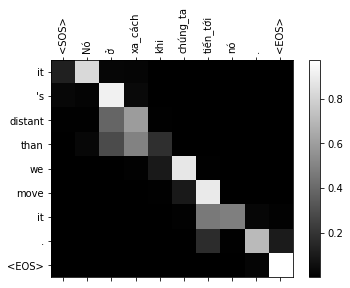

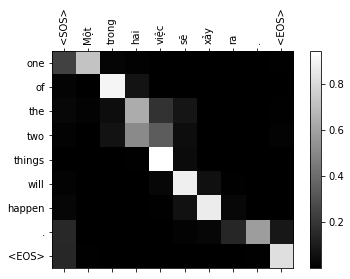

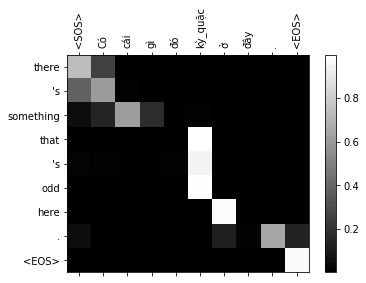

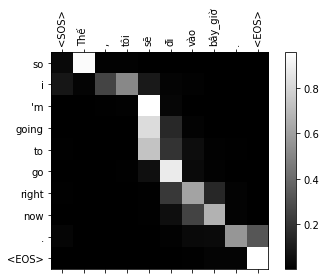

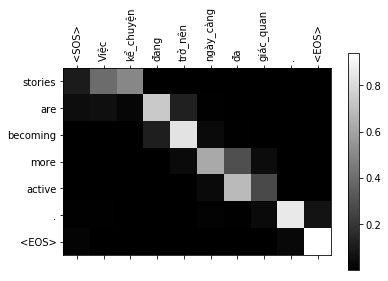

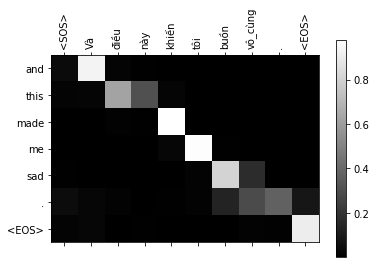

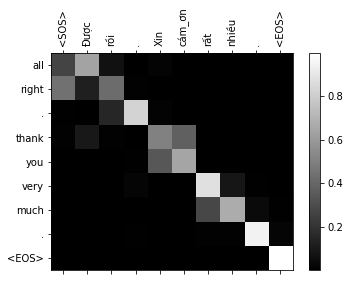

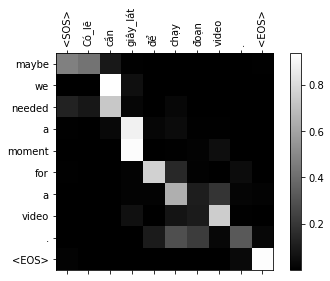

In [6]:
for i in range(5):
    combined_attention_list = torch.cat(attention_list[i], dim=0)
    for j, (input_sentence, output_words) in enumerate(zip(test_source_list[i], translation_output_list[i])):
        showAttention(input_sentence, output_words, combined_attention_list[:,j,:])


In [7]:
for i in range(5):
    for triplet in zip(test_source_list[i], test_reference_list[i], translation_output_list[i]):
        print(triplet)

('Và vấn_đề là đây .', "and here 's the thing", "and here 's the problem .")
('Và tôi quay_lại làm_việc .', 'and i went back to work', 'and i went back to work .')
('Và tôi cứ tự_hỏi .', 'and i kept asking myself these questions', 'and i asked myself questions .')
('Ồ , tại_sao không ?', 'hey why not', 'well , why not ?')
('Cảm_ơn các bạn rất nhiều', 'thank you very much', 'thank you very much .')
('Để tôi khái_quát lại .', 'so let me recap', 'let me just summarize it .')
('Bạn thật bận_rộn đó .', 'how engaged you are', "you 're busy that busy .")
('Đây là miêu_tả của con_người', "here 's a description of the road", 'this is the description of humans .')
('Nó vẫn chưa bị ngộp', 'it was not drowned yet', "it hasn 't been empty .")
('chúng vẫn rất yên_ổn .', 'they were still kind of happy', "they 're highly safe .")
('Còn có rất nhiều cá', 'there were still <unk>', 'there are lots of fish .')
('Chúng_ta vẫn nghĩ nó còn_nguyên_sơ', 'we still think it is pristine', "we still think it 's <u